In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = None

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
houseprices_train = pd.read_csv('houseprices_train.csv')
houseprices_test = pd.read_csv('houseprices_test.csv')

hp_train = houseprices_train.copy()
hp_test = houseprices_test.copy()

----
# Exploratoring the Data

In [3]:
hp_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
hp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

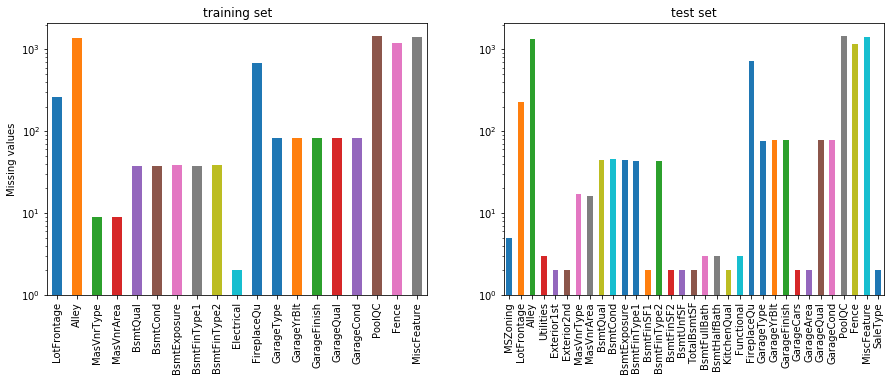

In [6]:
pct_missing_train = hp_train.isnull().sum() 
pct_missing_test = hp_test.isnull().sum() 

fig, (ax1, ax2) = plt.subplots(1, 2)
_ = pct_missing_train[pct_missing_train > 0].plot(kind='bar', ax=ax1, figsize=(15,5), log=True)
_ = pct_missing_test[pct_missing_test > 0].plot(kind='bar', ax=ax2, figsize=(15,5), log=True)
ax1.set_title('training set')
ax2.set_title('test set')
ax1.set_ylabel('Missing values')
plt.show()

In [7]:
hp_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
hp_train.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

---
+ ### Target Feature

C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


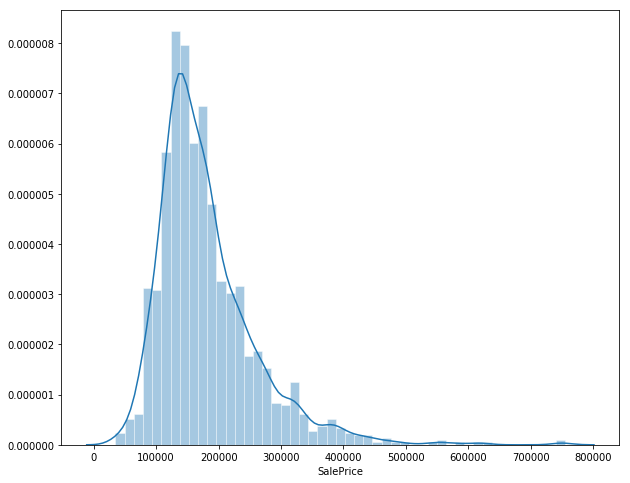

In [9]:
plt.figure(figsize=(10,8))
_ = sns.distplot(hp_train.SalePrice, hist_kws={'edgecolor':'white'})

#### Outliers
The author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset (https://ww2.amstat.org/publications/jse/v19n3/decock.pdf).
But we actually will remove only those two large houses with low price, since they don't seem to represent actual market values. There are other two big houses (GrLivArea > 4000), but they seem to follow the general trend.


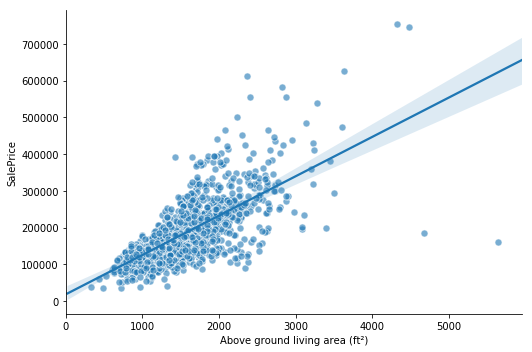

In [10]:
_ = sns.lmplot(x="GrLivArea", y="SalePrice", data=hp_train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, size=5, aspect=1.5)
plt.xlabel('Above ground living area (ft²)')
plt.xlim(0,)
plt.show()

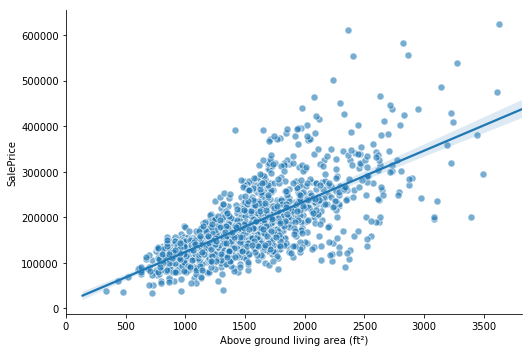

In [11]:
#hp_train = hp_train[~((hp_train.GrLivArea > 4000) & (hp_train.SalePrice <300000))]
hp_train = hp_train[~(hp_train.GrLivArea > 4000)]

_ = sns.lmplot(x="GrLivArea", y="SalePrice", data=hp_train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
               size=5, aspect=1.5)
plt.xlabel('Above ground living area (ft²)')
plt.xlim(0,)
plt.show()

---
+ ### Numerical Variables

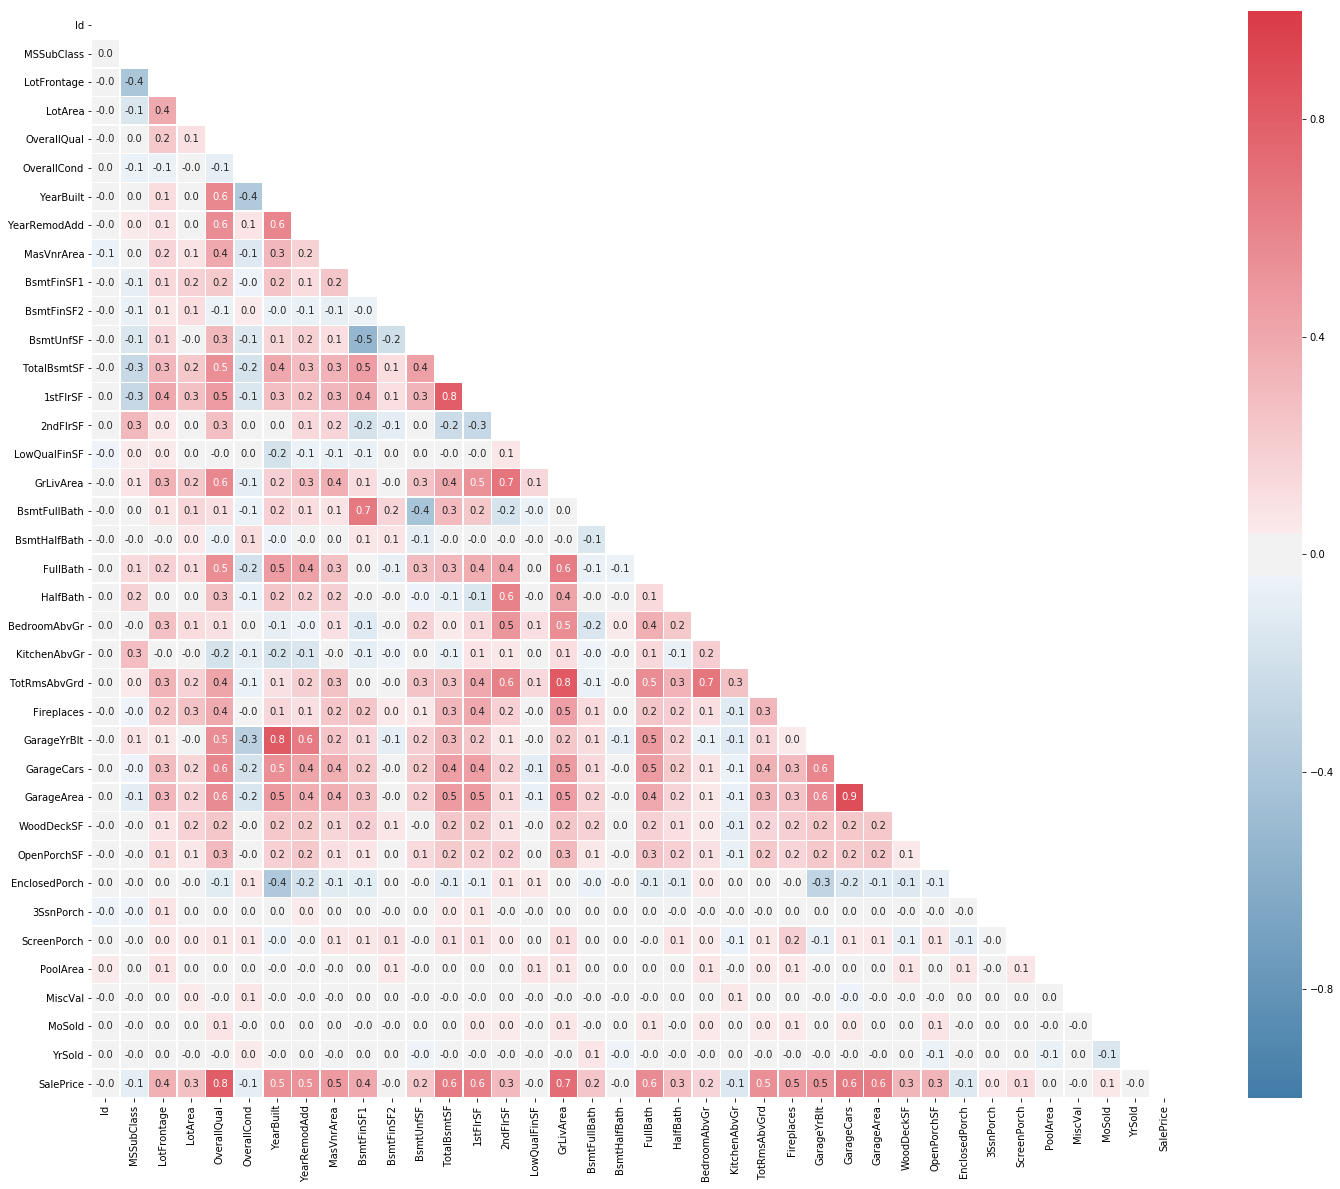

In [12]:
corr = hp_train.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
# (https://matplotlib.org/examples/color/colormaps_reference.html)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.1f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

In [13]:
numeric_columns = list(hp_train._get_numeric_data().columns)
# hp_train.select_dtypes(exclude=['object']).columns
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

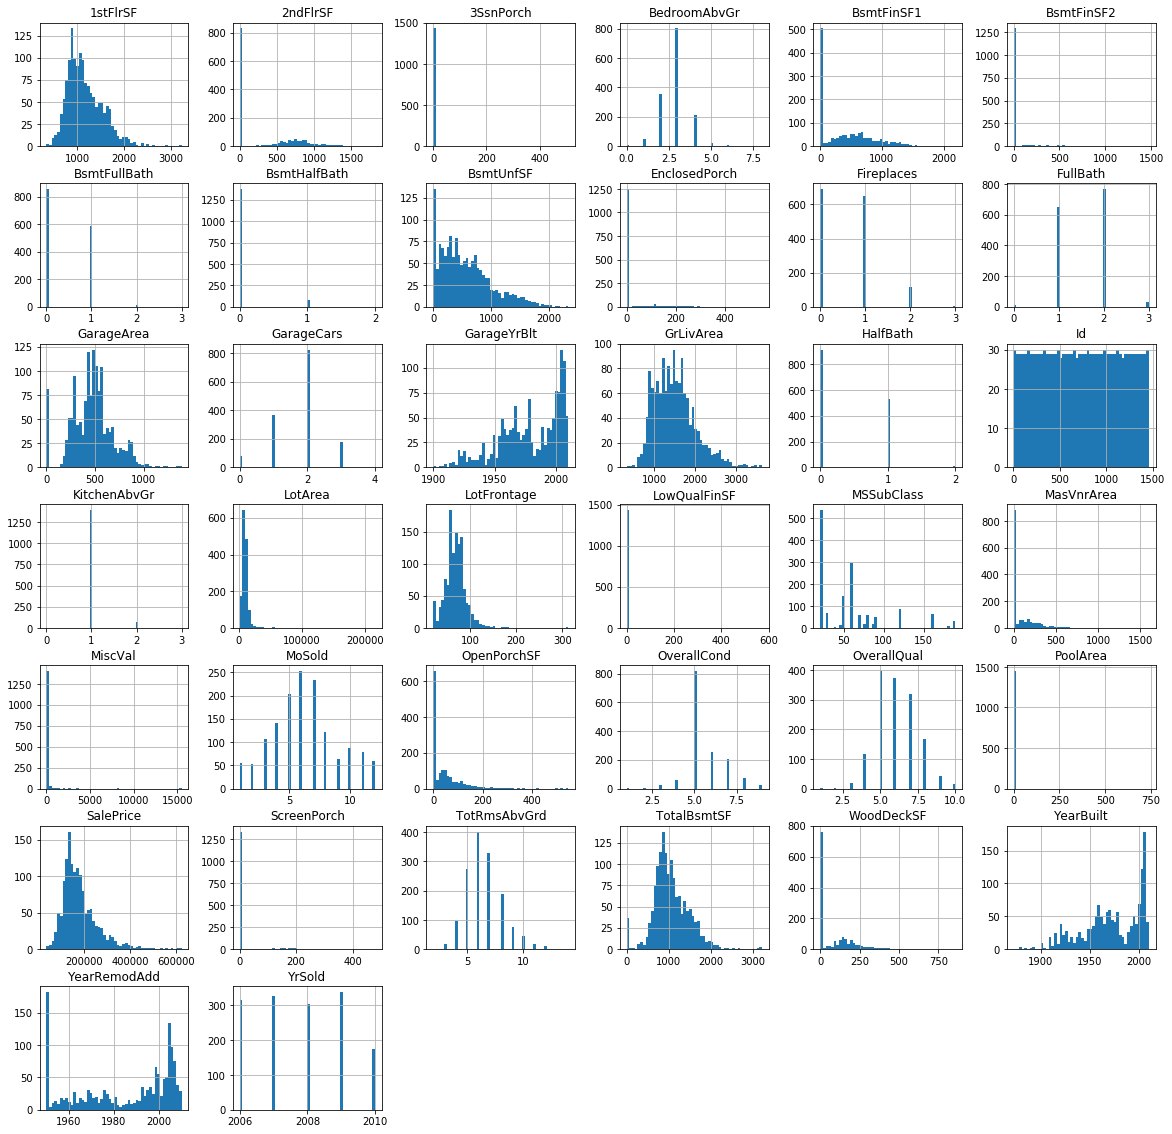

In [14]:
hp_train[numeric_columns].hist(bins=50, figsize=(20,20))
plt.show()

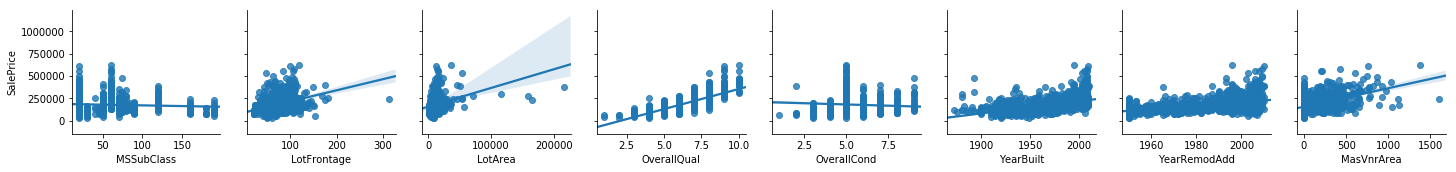

In [15]:
attributes = numeric_columns[1: len(numeric_columns)//4]

_ = sns.pairplot(data=hp_train, x_vars=attributes, y_vars=['SalePrice'], kind='reg')
plt.show()

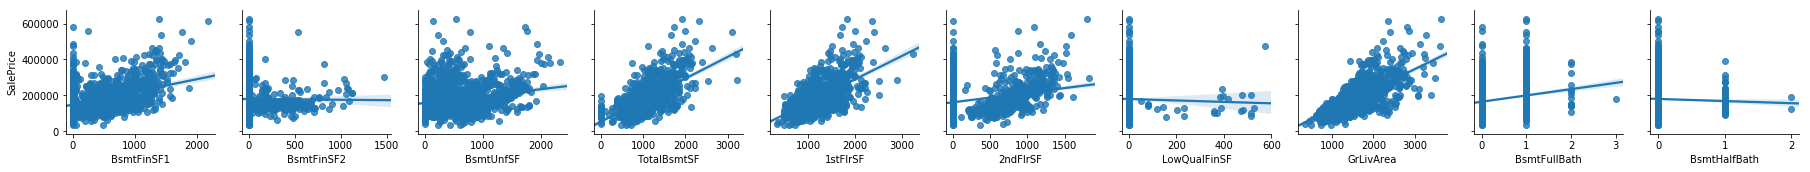

In [16]:
attributes = numeric_columns[len(numeric_columns)//4 : len(numeric_columns)//2]

_ = sns.pairplot(data=hp_train, x_vars=attributes, y_vars=['SalePrice'], kind='reg')
plt.show()

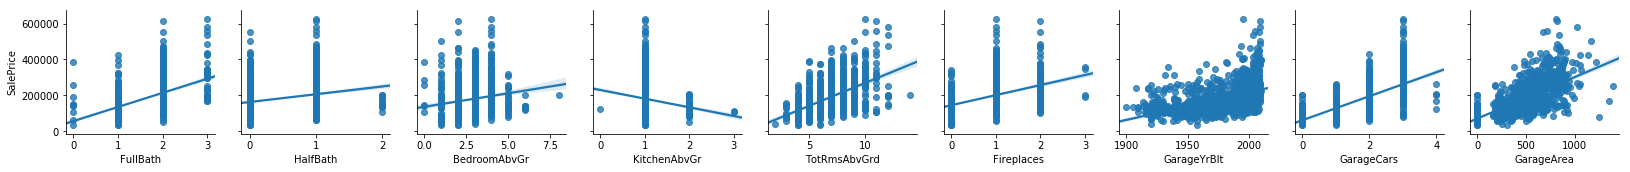

In [17]:
attributes = numeric_columns[len(numeric_columns)//2 : 3*len(numeric_columns)//4]

_ = sns.pairplot(data=hp_train, x_vars=attributes, y_vars=['SalePrice'], kind='reg')
plt.show()

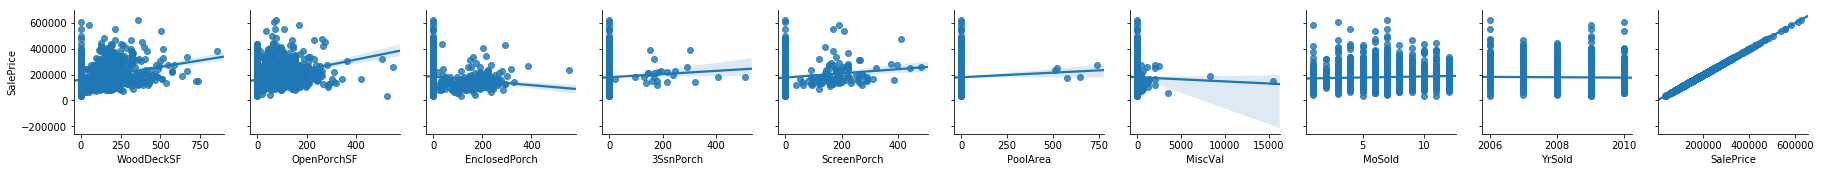

In [18]:
attributes = numeric_columns[3*len(numeric_columns)//4 : len(numeric_columns)]

_ = sns.pairplot(data=hp_train, x_vars=attributes, y_vars=['SalePrice'], kind='reg')
plt.show()

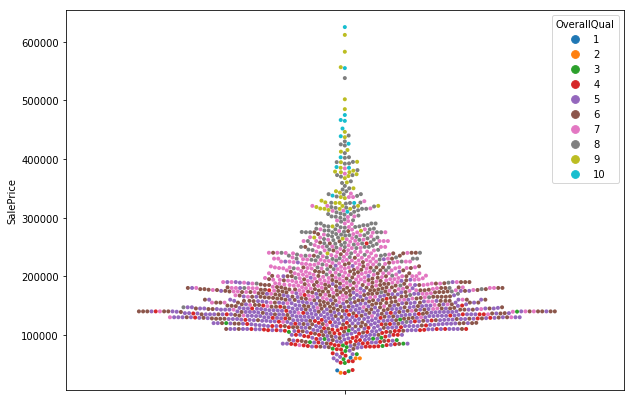

In [19]:
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='OverallQual', s=4)

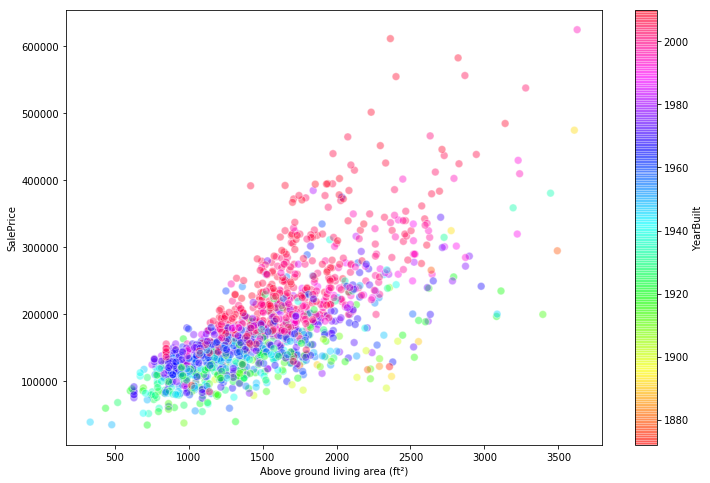

In [20]:
_ = hp_train.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.4, s=60, c="YearBuilt", 
                  cmap=plt.get_cmap("hsv"), edgecolor='w', colorbar=True, figsize=(12,8), sharex=False)
plt.xlabel('Above ground living area (ft²)')
plt.show()

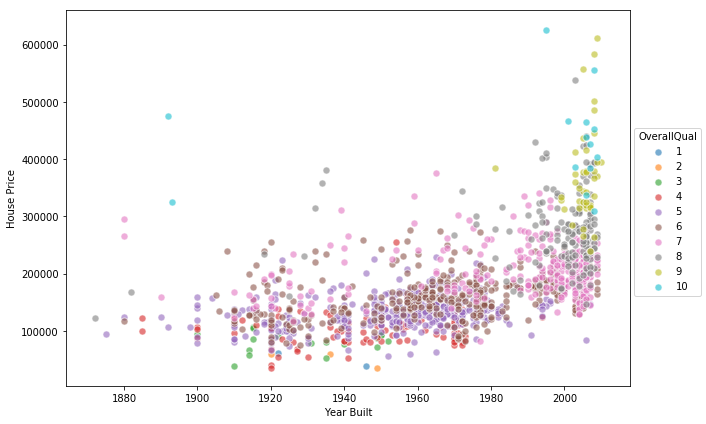

In [21]:
g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='OverallQual', despine=False)
g.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.6)
g.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

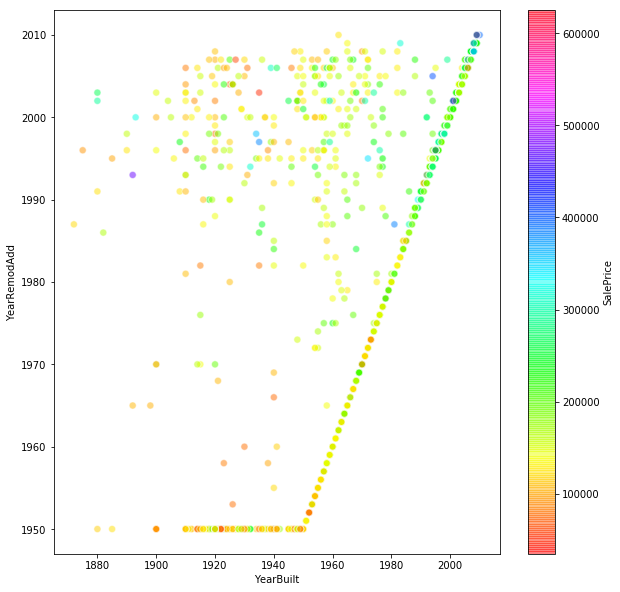

In [22]:
_ = hp_train.plot(kind='scatter', x='YearBuilt', y='YearRemodAdd', alpha=0.5, s=50, c="SalePrice", 
                  cmap=plt.get_cmap("hsv"), edgecolor='w', colorbar=True, figsize=(10,10), sharex=False)

It seems that some feature selection and engineering must be done.

+ ### Categorical features

In [23]:
cat_columns = hp_train.select_dtypes(include=['object']).columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
hp_train.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1456   1456    91     1456        1456      1456      1456   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      925        1309      1455      1051   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1456         1456       1456       1456     1456       1456   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1378          225       1258       1442     1216        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1456     1456        1456        1456       1448      1456   
unique         6        7          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1140     1432         515         504        863       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1456       1456     1419     1419         1418         1419   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1278        643      649     1307          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1418    1456      1456       1456       1455        1456   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1252    1424       737       1361       1330         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1456         766       1375         1375       1375       1375   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1356         378        867          605       1307       1322   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1456      5    280          54     1456          1456  
unique          3      3      4           4        9             6  
top             Y     Fa  MnPrv        Shed       WD        Normal  
freq         1336      2    156          49     1265          1197

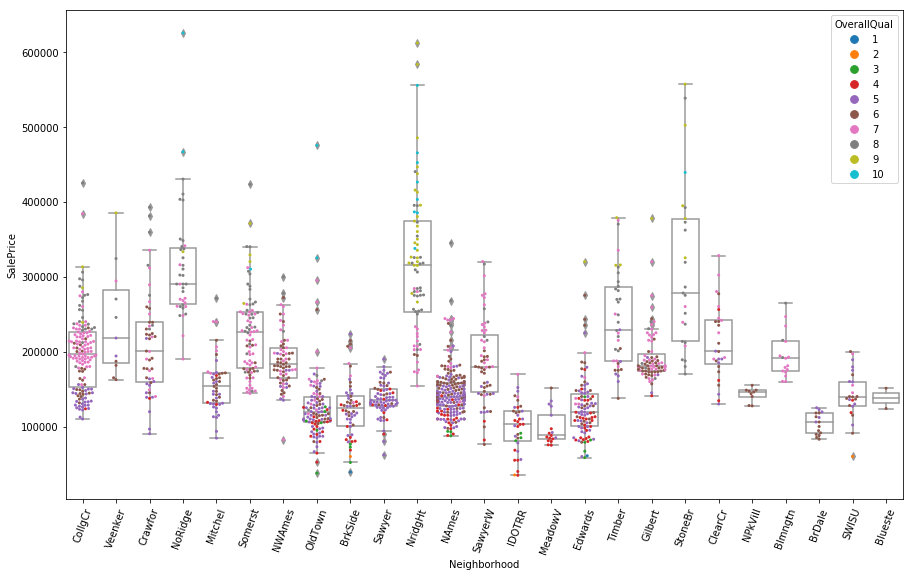

In [25]:
plt.figure(figsize=(15,9))
_ = sns.swarmplot(x='Neighborhood', y='SalePrice', data=hp_train, hue='OverallQual', s=3, alpha=1)
_ = sns.boxplot(x='Neighborhood', y='SalePrice', data=hp_train, color="1")
plt.xticks(rotation=70)
plt.show()

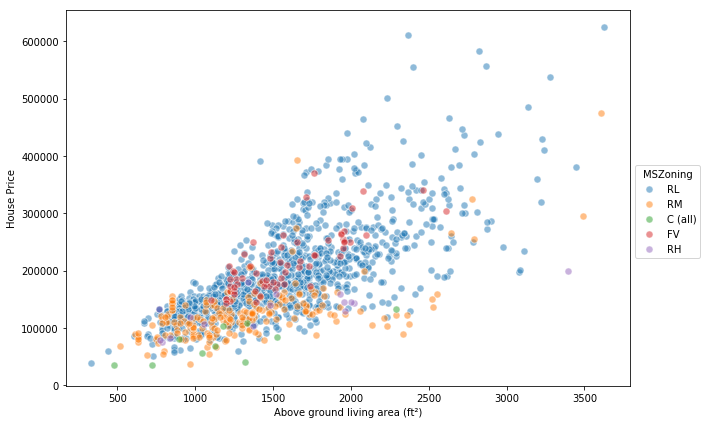

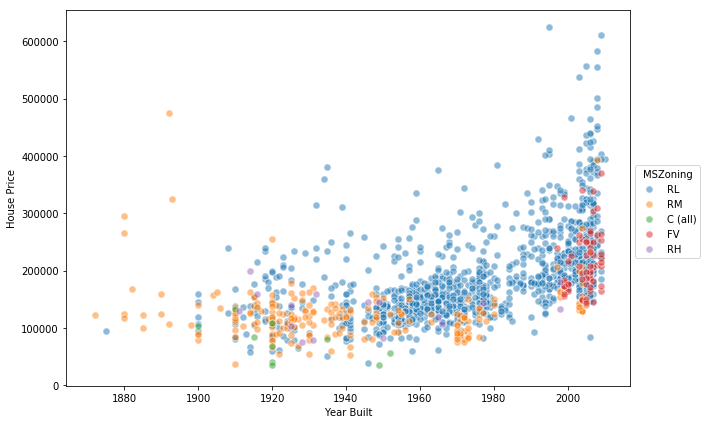

In [26]:
g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='MSZoning', despine=False)
g.map(plt.scatter,'GrLivArea', 'SalePrice', edgecolor='w', s=50, alpha=0.5)
g.add_legend()
plt.xlabel('Above ground living area (ft²)')
plt.ylabel('House Price')
plt.show()

g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='MSZoning', despine=False)
g.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.5)
g.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

In [27]:
hp_train[['MSZoning', 'SalePrice']].groupby('MSZoning').agg(['count', 'mean'])

SalePrice               
             count           mean
MSZoning                         
C (all)         10   74528.000000
FV              65  214014.061538
RH              16  131558.375000
RL            1147  190062.771578
RM             218  126316.830275

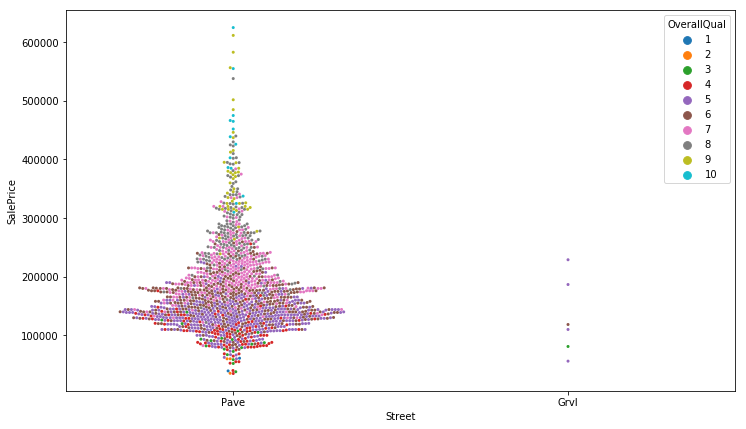

In [28]:
plt.figure(figsize=(12,7))
_ = sns.swarmplot(x='Street', y='SalePrice', data=hp_train, hue='OverallQual', s=3, alpha=1)

I would say that 'Street' has not enough variability to be estatistically relevant and may be dropped.

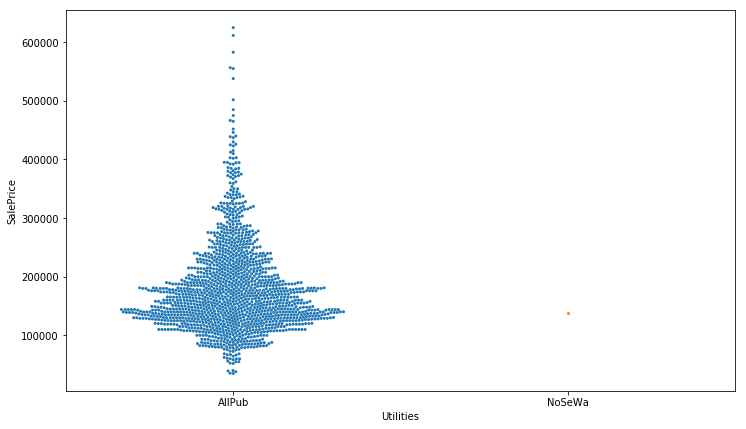

In [29]:
plt.figure(figsize=(12,7))
_ = sns.swarmplot(x='Utilities', y='SalePrice', data=hp_train, s=3, alpha=1)

I would say that 'Utilities' has not enough variability to be estatistically relevant and may be dropped.

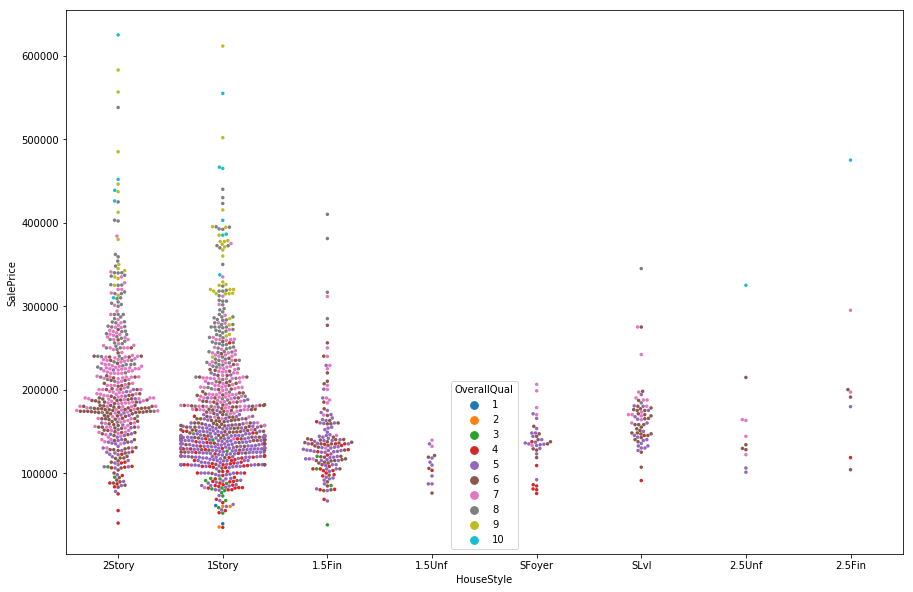

In [30]:
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='HouseStyle', y='SalePrice', data=hp_train, hue='OverallQual', s=3.5)

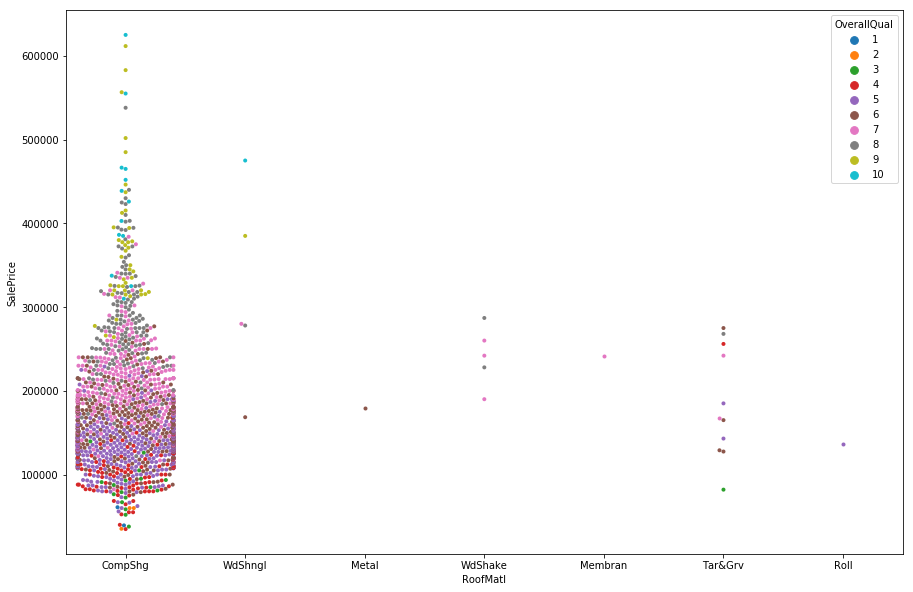

In [31]:
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='RoofMatl', y='SalePrice', data=hp_train, hue='OverallQual', s=4)

It seems that the 'RoofMatl' isn't statistically relevant as well due to low variability. Furthermore, the difference in price seems to be more a question of Overall quality (OverallQqual) rather than the roof material. This feature may be dropped.

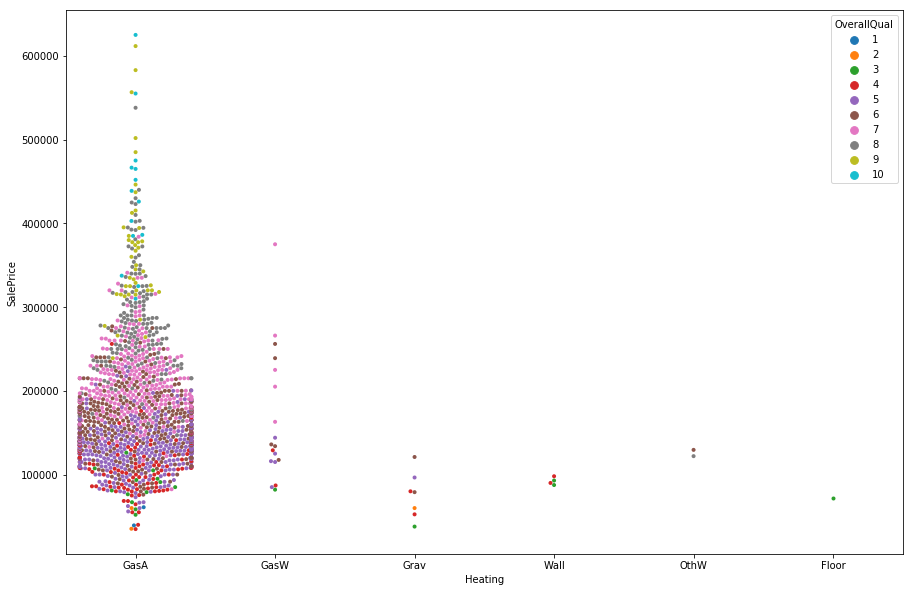

In [32]:
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='Heating', y='SalePrice', data=hp_train, hue='OverallQual', s=4)

It seems that the 'Heating' isn't statistically relevant as well due to low variability.

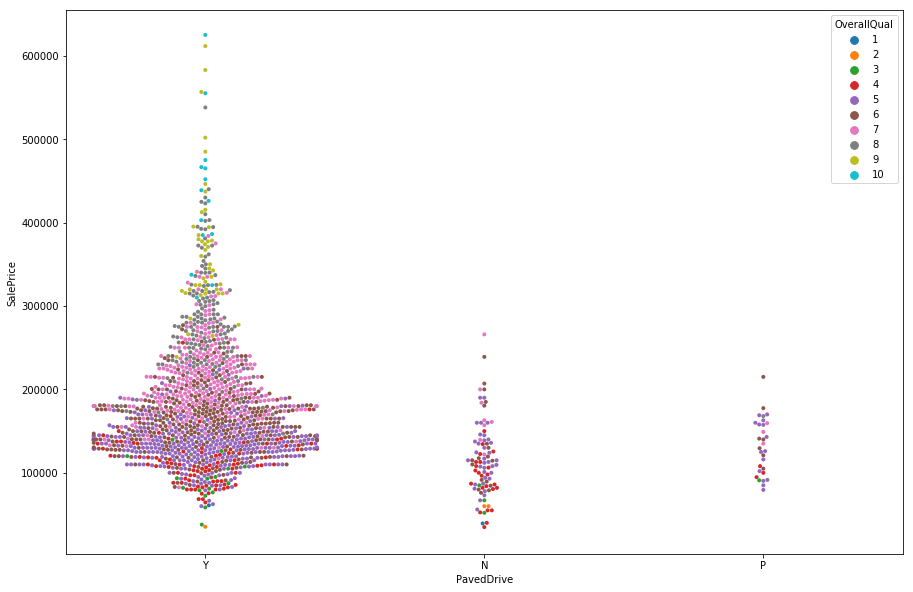

In [33]:
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='PavedDrive', y='SalePrice', data=hp_train, hue='OverallQual', s=4)

----
# Missing Values

+  #### Filling 'LotFrontage' missing values

In [34]:
hp_train.LotFrontage.isnull().sum()

259

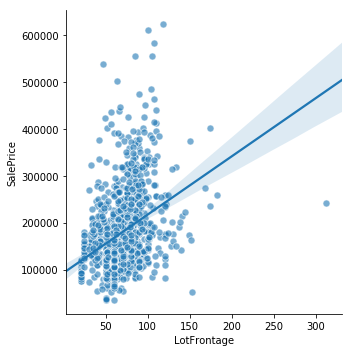

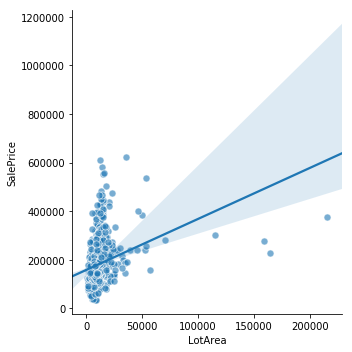

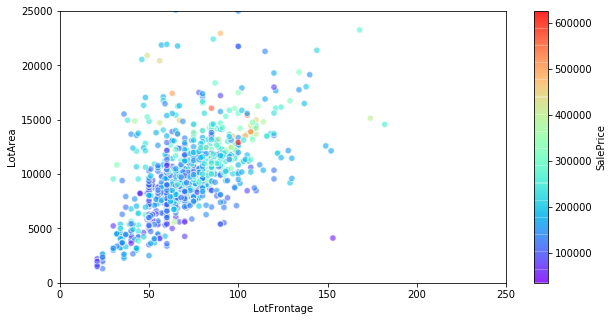

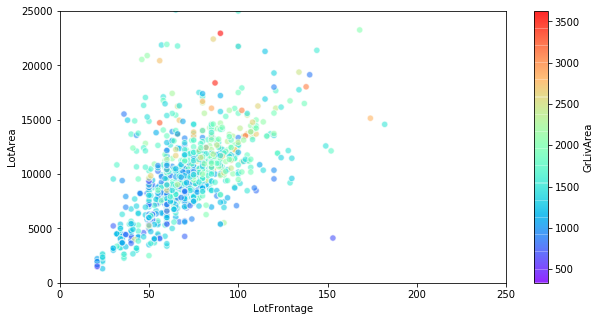

In [35]:
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet

_ = sns.lmplot(x='LotFrontage', y='SalePrice', data=hp_train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50})
plt.show()

_ = sns.lmplot(x='LotArea', y='SalePrice', data=hp_train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50})
plt.show()

grid = hp_train.plot(kind="scatter", y='LotArea', x='LotFrontage',s=40, edgecolor='w', alpha=0.6, figsize=(10,5), 
                              c="SalePrice", cmap=plt.get_cmap("rainbow"), colorbar=True, sharex=False)
grid.set_xlim(0,250)
grid.set_ylim(0,25000)
plt.show()

grid = hp_train.plot(kind="scatter", y='LotArea', x='LotFrontage',s=40, edgecolor='w', alpha=0.6, figsize=(10,5), 
                              c="GrLivArea", cmap=plt.get_cmap("rainbow"), colorbar=True, sharex=False)

grid.set_xlim(0,250)
grid.set_ylim(0,25000)
plt.show()


In [36]:
for df_set in (hp_train, hp_test):
    df_set["LotAreaBucket"] = df_set["LotArea"] // 2500 * 2500
    df_set["LotAreaBucket"].where(df_set["LotAreaBucket"] < 22500, 22500, inplace=True)
hp_train[['LotFrontage', 'LotAreaBucket']].groupby('LotAreaBucket').agg(['count', 'median', 'mean', 'std'])

LotFrontage                              
                    count median        mean        std
LotAreaBucket                                          
0                      37   21.0   22.783784   3.497103
2500                   81   40.0   42.061728  15.934511
5000                  186   60.0   57.940860  11.373357
7500                  415   70.0   69.048193  12.018809
10000                 297   80.0   79.255892  15.848582
12500                 104   85.0   85.894231  22.827304
15000                  36   83.0   87.055556  29.838560
17500                  11  120.0  115.818182  21.217060
20000                  11   66.0   79.909091  31.583079
22500                  19   90.0  104.315789  64.884558

In [37]:
dict_LotFrontage = hp_train.groupby('LotAreaBucket')['LotFrontage'].agg('median')
dict_LotFrontage

LotAreaBucket
0         21.0
2500      40.0
5000      60.0
7500      70.0
10000     80.0
12500     85.0
15000     83.0
17500    120.0
20000     66.0
22500     90.0
Name: LotFrontage, dtype: float64

In [38]:
for df_set in (hp_train, hp_test):
    df_set['LotFrontage'] = df_set['LotFrontage'].fillna(df_set['LotAreaBucket'].map(dict_LotFrontage))

+ #### Filling 'MSZoning' missing values

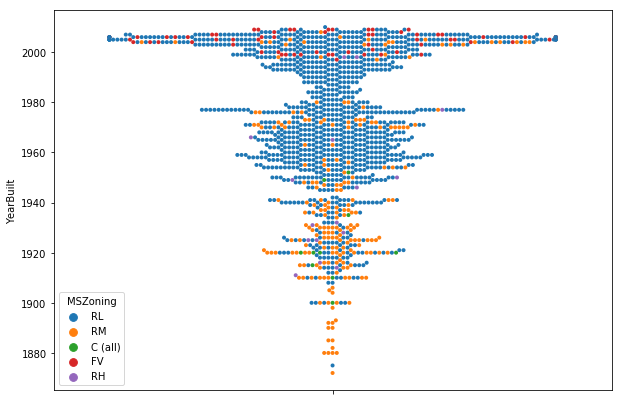

In [39]:
#MSZoning: Identifies the general zoning classification of the sale.
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='YearBuilt', data=hp_train, x=[""]*len(hp_train), hue='MSZoning', s=4)

In [40]:
for df_set in (hp_train, hp_test):
    df_set["YearBucket"] = df_set["YearBuilt"] // 20 * 20

dict_MSZoning = hp_train.groupby('YearBucket')["MSZoning"].agg(lambda x:x.value_counts().index[0])
dict_MSZoning

YearBucket
1860    RL
1880    RM
1900    RL
1920    RM
1940    RL
1960    RL
1980    RL
2000    RL
Name: MSZoning, dtype: object

In [41]:
for df_set in (hp_train, hp_test):
    df_set['MSZoning'] = df_set['MSZoning'].fillna(df_set['YearBucket'].map(dict_MSZoning))

hp_test.MSZoning.value_counts(dropna=False)

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

+ #### Filling 'Alley' missing values


In [42]:
#Alley: Type of alley access to property (NA: No alley access)
hp_train['Alley'].value_counts(dropna=False)

NaN     1365
Grvl      50
Pave      41
Name: Alley, dtype: int64

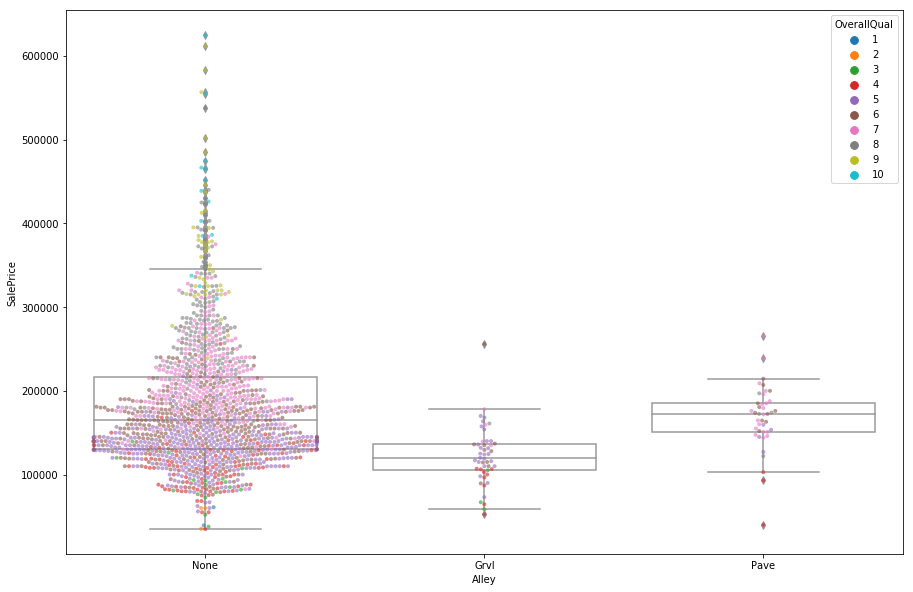

In [43]:
# filling the 'Alley' missing values (train and testset)
for df_set in [hp_train, hp_test]:
    df_set['Alley'] = df_set['Alley'].fillna('None')

plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='Alley', y='SalePrice', data=hp_train, hue='OverallQual', s=4, alpha=0.6)
_ = sns.boxplot(x='Alley', y='SalePrice', color='1', data=hp_train)
plt.show()


+ ####  Filling 'Exterior1st' and 'Exterior2nd' missing values

In [44]:
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)

# Most frequent: VinylSd
hp_test[['Exterior1st', 'Exterior2nd']] = hp_test[['Exterior1st', 'Exterior2nd']].fillna('VinylSd')

+ ####  Filling 'MasVnrType' and 'MasVnrArea' missing values
MasVnrType has one less missing value than MasVnrArea in the test set. Therefore we need to fill MasVnrArea before filling MasVnrType.

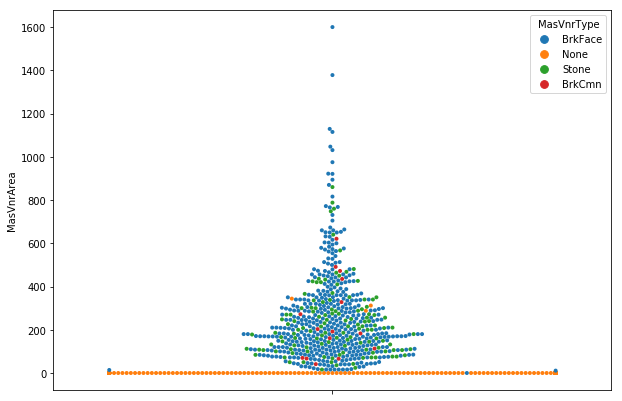

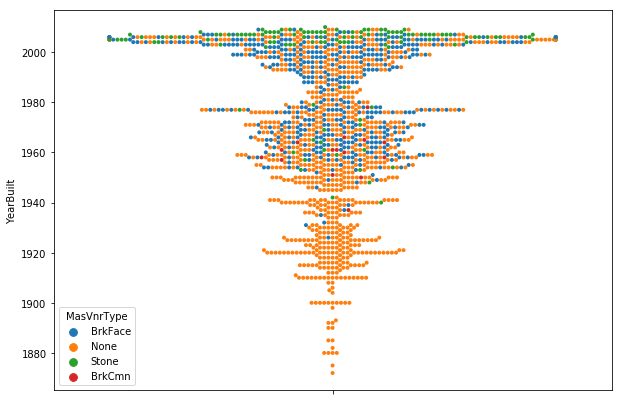

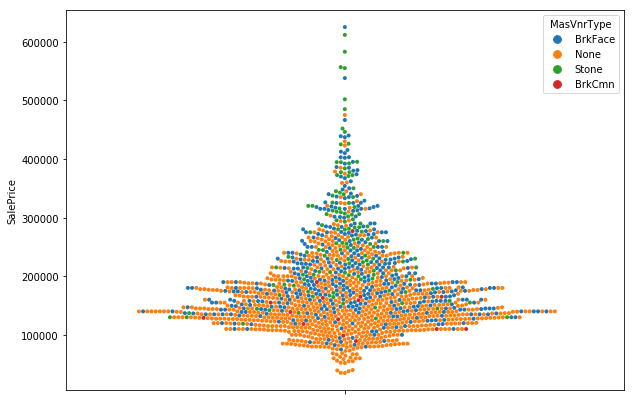

In [45]:
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='MasVnrArea', data=hp_train, x=[""]*len(hp_train), hue='MasVnrType', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='YearBuilt', data=hp_train, x=[""]*len(hp_train), hue='MasVnrType', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='MasVnrType', s=4)
plt.show()

In [46]:
hp_test[hp_test['MasVnrType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
231   1692          60       RL         85.0    12891   Pave  None      IR1   
246   1707          20       FV         90.0     7993   Pave  None      IR1   
422   1883          60       RL         70.0     8749   Pave  None      Reg   
532   1993          60       RL         70.0     7750   Pave  None      Reg   
544   2005          20       RL         87.0    10037   Pave  None      Reg   
581   2042          60       FV         70.0     7500   Pave  None      Reg   
851   2312          60       RL         59.0    15810   Pave  None      IR1   
865   2326          80       RL         80.0    11950   Pave  None      IR1   
880   2341          20       RL         85.0     9965   Pave  None      Reg   
889   2350          60       FV        112.0    12217   Pave  None      IR1   
908   2369         120       FV         30.0     5330   Pave  Pave      IR2   
1132  2593          20       RL         68.0     8298   Pave  None      IR1   
1150  2611          20       RL        124.0    27697   Pave  None      Reg   
1197  2658          60       RL        103.0    12867   Pave  None      IR1   
1226  2687          20       RL         49.0    15218   Pave  None      IR1   
1402  2863          20       RL         75.0     8050   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
231          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
246          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
422          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
532          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
544          Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
581          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
851          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
865          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
880          Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
889          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
908          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1132         HLS    AllPub    Inside       Gtl       Timber       Norm   
1150         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1197         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
1226         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
1402         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
231        Norm     1Fam     2Story            8            5       2002   
246        Norm     1Fam     1Story            7            5       2008   
422        Norm     1Fam     2Story            7            5       2002   
532        Norm     1Fam     2Story            7            5       2002   
544        Norm     1Fam     1Story            8            5       2006   
581        Norm     1Fam     2Story            7            5       2002   
851        Norm     1Fam     2Story            6            5       2007   
865        Norm     1Fam       SLvl            7            5       2003   
880        Norm     1Fam     1Story            7            5       2007   
889        Norm     1Fam     2Story            8            5       2007   
908        Norm   TwnhsE     1Story            8            5       2006   
1132       Norm     1Fam     1Story            8            5       2006   
1150       Norm     1Fam     1Story            4            3       1961   
1197       Norm     1Fam     2Story            8            5       2005   
1226       Norm     1Fam     1Story            8            5       2006   
1402       Norm     1Fam     1Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
231           2002     Gable  CompSh

In [47]:
for df_set in (hp_train, hp_test):
    df_set["YearBucket"] = df_set["YearBuilt"] // 5 * 5
    
dict_MasVnrType = hp_train.groupby('YearBucket')['MasVnrType'].agg(lambda x:x.value_counts().index[0])
dict_MasVnrType

YearBucket
1870       None
1875       None
1880       None
1885       None
1890       None
1895       None
1900       None
1905       None
1910       None
1915       None
1920       None
1925       None
1930       None
1935       None
1940       None
1945       None
1950       None
1955       None
1960    BrkFace
1965       None
1970       None
1975       None
1980       None
1985    BrkFace
1990       None
1995    BrkFace
2000    BrkFace
2005      Stone
2010      Stone
Name: MasVnrType, dtype: object

In [48]:
# The specific house with NaN value for MasVnrType but not for MasVnrArea (198 ft²) was built in 1961, 
# so we will fill the NaN with the most common VnrType for that time: 'BrkFace'

hp_test.loc[hp_test.Id == 2611, 'MasVnrType'] = hp_test.loc[hp_test.Id == 2611, 'MasVnrType'].fillna('BrkFace')
hp_test[hp_test.Id == 2611]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1150  2611          20       RL        124.0    27697   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1150         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1150       Norm     1Fam     1Story            4            3       1961   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1150          1961      Shed  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1150       198.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1150           No          BLQ       811.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1150      585.0       1396.0    GasA        TA          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1150      1608         0             0       1608           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1150         1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1150             6        Typ           0         NaN     Attchd       1961.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1150          Unf         1.0       444.0         TA         Fa          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1150         152           38              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1150         0    NaN   NaN         NaN        0      11    2007      COD   

     SaleCondition  LotAreaBucket  YearBucket  
1150       Abnorml          22500        1960

In [49]:
for df_set in (hp_train, hp_test):
    df_set['MasVnrType'] = df_set['MasVnrType'].fillna(df_set['YearBucket'].map(dict_MasVnrType))

hp_test['MasVnrType'].value_counts(dropna=False)

None       878
BrkFace    441
Stone      130
BrkCmn      10
Name: MasVnrType, dtype: int64

In [50]:
dict_MasVnrArea = hp_train.groupby('MasVnrType')["MasVnrArea"].agg('median')
dict_MasVnrArea

MasVnrType
BrkCmn     192.0
BrkFace    201.0
None         0.0
Stone      202.5
Name: MasVnrArea, dtype: float64

In [51]:
for df_set in (hp_train, hp_test):
    df_set['MasVnrArea'] = df_set['MasVnrArea'].fillna(df_set['MasVnrType'].map(dict_MasVnrArea))

hp_test['MasVnrArea'].isnull().sum()

0

+ ####  Filling 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' missing values

In [52]:
# BsmtQual: Evaluates the height of the basement (NA: No Basement)
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinType2: Rating of basement finished area (if multiple types)

hp_train[hp_train.BsmtQual.isnull()].head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17    18          90       RL         72.0    10791   Pave  None      Reg   
39    40          90       RL         65.0     6040   Pave  None      Reg   
90    91          20       RL         60.0     7200   Pave  None      Reg   
102  103          90       RL         64.0     7018   Pave  None      Reg   
156  157          20       RL         60.0     7200   Pave  None      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102         Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
17        Norm   Duplex     1Story            4            5       1967   
39        Norm   Duplex     1Story            4            5       1955   
90        Norm     1Fam     1Story            4            5       1950   
102       Norm   Duplex     1Story            5            5       1979   
156       Norm     1Fam     1Story            5            7       1950   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
17           1967     Gable  CompShg     MetalSd     MetalSd       None   
39           1955     Gable  CompShg     AsbShng     Plywood       None   
90           1950     Gable  CompShg     BrkFace     Wd Sdng       None   
102          1979     Gable  CompShg     HdBoard     HdBoard       None   
156          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
17          0.0        TA        TA       Slab      NaN      NaN          NaN   
39          0.0        TA        TA      PConc      NaN      NaN          NaN   
90          0.0        TA        TA       Slab      NaN      NaN          NaN   
102         0.0        TA        Fa       Slab      NaN      NaN          NaN   
156         0.0        TA        TA     CBlock      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
17           NaN           0          NaN           0          0            0   
39           NaN           0          NaN           0          0            0   
90           NaN           0          NaN           0          0            0   
102          NaN           0          NaN           0          0            0   
156          NaN           0          NaN           0          0            0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
17     GasA        TA          Y      SBrkr      1296         0             0   
39     GasA        TA          N      FuseP      1152         0             0   
90     GasA        TA          Y      FuseA      1040         0             0   
102    GasA        TA          Y      SBrkr      1535         0             0   
156    GasA        TA          Y      FuseF      1040         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
17        1296             0             0         2         0             2   
39        1152             0             0         2         0             2   
90        1040             0             0         1         0             2   
102       1535             0             0         2         0             4   
156       1040             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
17              2          TA             6        Typ           0   
39              2          Fa             6        Typ           0   
90              1          TA             4       

In [53]:
hp_train.loc[hp_train.Id==333, 'BsmtFinType2'] = hp_train.loc[hp_train.Id==333, 'BsmtFinType2'].fillna('Rec')

In [54]:
hp_train[hp_train.Id==333]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
332         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
332       Norm     1Fam     1Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
332          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
332       296.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
332          GLQ        1124          Rec         479       1603         3206   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
332    GasA        Ex          Y      SBrkr      1629         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
332       1629             1             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
332             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
332          Gd     Attchd       2003.0          RFn           3         880   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
332         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
332          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  LotAreaBucket  \
332      10    2009       WD        Normal     284000          10000   

     YearBucket  
332        2000

In [55]:
for df_set in (hp_train, hp_test):
    df_set[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df_set[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')
    
hp_train[(hp_train.TotalBsmtSF == 0) & (hp_train.BsmtQual != 'None')]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, LotAreaBucket, YearBucket]
Index: []

In [56]:
hp_train[hp_train['BsmtFinType2'] == 'None'].head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17    18          90       RL         72.0    10791   Pave  None      Reg   
39    40          90       RL         65.0     6040   Pave  None      Reg   
90    91          20       RL         60.0     7200   Pave  None      Reg   
102  103          90       RL         64.0     7018   Pave  None      Reg   
156  157          20       RL         60.0     7200   Pave  None      Reg   
182  183          20       RL         60.0     9060   Pave  None      Reg   
259  260          20       RM         70.0    12702   Pave  None      Reg   
342  343          90       RL         70.0     8544   Pave  None      Reg   
362  363          85       RL         64.0     7301   Pave  None      Reg   
371  372          50       RL         80.0    17120   Pave  None      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102         Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
182         Lvl    AllPub    Inside       Gtl      Edwards     Artery   
259         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
342         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
362         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
371         Lvl    AllPub    Inside       Gtl      ClearCr      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
17        Norm   Duplex     1Story            4            5       1967   
39        Norm   Duplex     1Story            4            5       1955   
90        Norm     1Fam     1Story            4            5       1950   
102       Norm   Duplex     1Story            5            5       1979   
156       Norm     1Fam     1Story            5            7       1950   
182       Norm     1Fam     1Story            5            6       1957   
259       Norm     1Fam     1Story            5            5       1956   
342       Norm   Duplex     1Story            3            4       1949   
362       Norm     1Fam     SFoyer            7            5       2003   
371       Norm     1Fam     1.5Fin            4            4       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
17           1967     Gable  CompShg     MetalSd     MetalSd       None   
39           1955     Gable  CompShg     AsbShng     Plywood       None   
90           1950     Gable  CompShg     BrkFace     Wd Sdng       None   
102          1979     Gable  CompShg     HdBoard     HdBoard       None   
156          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
182          2006       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
259          1956     Gable  CompShg     BrkFace     BrkFace       None   
342          1950     Gable  CompShg      Stucco      Stucco    BrkFace   
362          2003     Gable  CompShg     HdBoard     HdBoard    BrkFace   
371          1959     Gable  CompShg     WdShing     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
17          0.0        TA        TA       Slab     None     None         None   
39          0.0        TA        TA      PConc     None     None         None   
90          0.0        TA        TA       Slab     None     None         None   
102         0.0        TA        Fa       Slab     None     None         None   
156         0.0        TA        TA     CBlock     None     None         None   
182        98.0        TA        TA      PConc     None     None         None   
259         0.0        TA        TA      PConc     None     None         None   
342       340.0        TA        TA       Slab     Non

In [57]:
hp_train.groupby('BsmtFinType2')['BsmtFinSF2'].count()

BsmtFinType2
ALQ       19
BLQ       33
GLQ       14
LwQ       46
None      37
Rec       55
Unf     1252
Name: BsmtFinSF2, dtype: int64

+ ####  Filling 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF' and 'TotalBsmtSF' missing values

In [58]:
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
hp_test[hp_test.BsmtFinSF2.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc     None     None         None   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660         None         NaN         None         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  LotAreaBucket  YearBucket  
660       4    2008    ConLD       Abnorml           5000        1945

In [59]:
hp_test[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = hp_test[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
                                                                           'TotalBsmtSF']].fillna(0)

+ #### Filling 'BsmtFullBath' and 'BsmtHalfBath' missing values

In [60]:
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms

hp_test[hp_test['BsmtFullBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave  None      IR1   
728  2189          20       RL        123.0    47007   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc     None     None         None   
728         0.0        TA        TA       Slab     None     None         None   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660         None         0.0         None         0.0        0.0          0.0   
728         None         0.0         None         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  LotAreaBucket  YearBucket  
660       4    2008    ConLD       Abnorml           5000        1945  
728       7    2008       WD        Normal          22500        1955

In [61]:
hp_test[['BsmtFullBath','BsmtHalfBath']] = hp_test[['BsmtFullBath','BsmtHalfBath']].fillna(0)

+ ####  Filling 'Electrical' missing values

In [62]:
#Electrical: Electrical system
hp_train['Electrical'].value_counts(dropna=False)

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [63]:
hp_train['Electrical'] = hp_train['Electrical'].fillna('Sbrkr')

+ ####  Filling 'KitchenQual' missing values

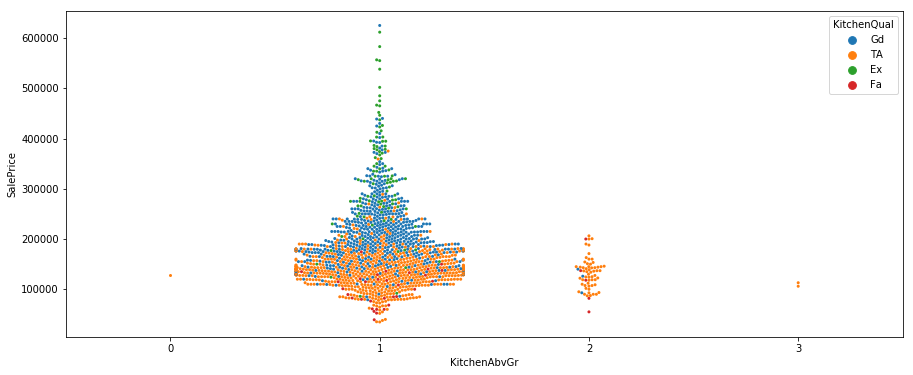

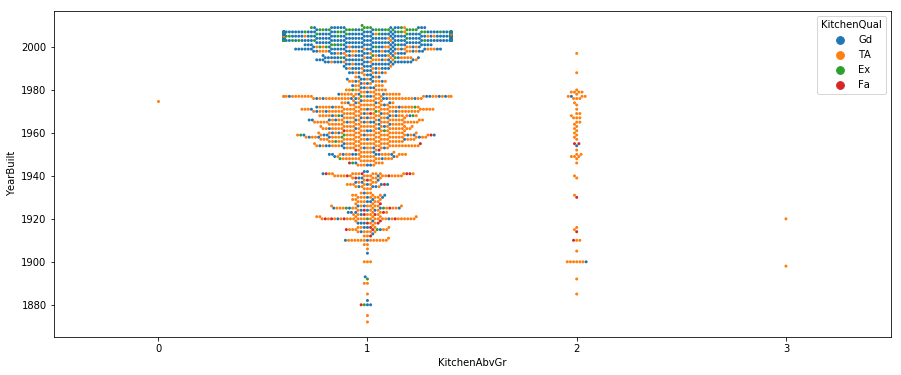

In [64]:
# KitchenQual: Kitchen quality
# Kitchen: Kitchens above grade

plt.figure(figsize=(15,6))
_ = sns.swarmplot(x='KitchenAbvGr', y='SalePrice', data=hp_train, hue='KitchenQual', s=3)
plt.show()

plt.figure(figsize=(15,6))
_ = sns.swarmplot(x='KitchenAbvGr', y='YearBuilt', data=hp_train, hue='KitchenQual', s=3)
plt.show()

In [65]:
hp_test[hp_test.KitchenQual.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
95  1556          50       RL         72.0    10632   Pave  None      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
95         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
95       Norm     1Fam     1.5Fin            5            3       1917   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
95          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
95         0.0        TA        TA     BrkTil       Gd       Fa           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
95          Unf         0.0          Unf         0.0      689.0        689.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
95    GasA        Gd          N      SBrkr       725       499             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
95       1224           0.0           0.0         1         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
95             1         NaN             6        Mod           0         NaN   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
95     Detchd       1917.0          Unf         1.0       180.0         Fa   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
95         Fa          N           0            0            248          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
95            0         0    NaN   NaN         NaN        0       1    2010   

   SaleType SaleCondition  LotAreaBucket  YearBucket  
95      COD        Normal          10000        1915

In [66]:
for df_set in (hp_train, hp_test):
    df_set['YearBucket'] = df_set['YearBuilt'] // 20 * 20
    
dict_KitchenQual = hp_train.groupby('YearBucket')['KitchenQual'].agg(lambda x: x.value_counts().index[0])
dict_KitchenQual

YearBucket
1860    TA
1880    TA
1900    TA
1920    TA
1940    TA
1960    TA
1980    Gd
2000    Gd
Name: KitchenQual, dtype: object

In [67]:
hp_test['KitchenQual'] = hp_test['KitchenQual'].fillna(hp_test['YearBucket'].map(dict_KitchenQual))

+ ####  Filling 'Functional' missing values

In [68]:
# Functional: Home functionality (Assume typical unless deductions are warranted)

hp_test[hp_test['Functional'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
756   2217          20       RL         80.0    14584   Pave  None      Reg   
1013  2474          50       RM         60.0    10320   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
1013         Lvl    AllPub    Corner       Gtl       IDOTRR     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
756        Norm     1Fam     1Story            1            5       1952   
1013       Norm     1Fam     1.5Fin            4            1       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
1013          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
756          0.0        Fa        Po       Slab     None     None   
1013         0.0        Fa        Fa     CBlock       TA       Fa   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
756          None         None         0.0         None         0.0   
1013           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
756         0.0          0.0    Wall        Po          N      FuseA   
1013      771.0        771.0    GasA        Fa          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
756        733         0             0        733           0.0           0.0   
1013       866       504           114       1484           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
756          1         0             2             1          Fa   
1013         2         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
756              4        NaN           0         NaN     Attchd       1952.0   
1013             6        NaN           0         NaN     Detchd       1910.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
756           Unf         2.0       487.0         Fa         Po          N   
1013          Unf         1.0       264.0         TA         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
756            0            0              0          0            0   
1013          14          211              0          0           84   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
756          0    NaN   NaN         NaN        0       2    2008       WD   
1013         0    NaN   NaN         NaN        0       9    2007      COD   

     SaleCondition  LotAreaBucket  YearBucket  
756        Abnorml          12500        1940  
1013       Abnorml          10000        1900

In [69]:
hp_test['Functional'] = hp_test['Functional'].fillna('Typ')

+ ####  Filling 'FireplaceQu' missing values

In [70]:
#FireplaceQu: Fireplace quality (NA: No Fireplace)

for df_set in (hp_train, hp_test):
    df_set['FireplaceQu'] = df_set['FireplaceQu'].fillna('None')

In [71]:
hp_train.groupby('FireplaceQu')['Fireplaces'].mean()

FireplaceQu
Ex      1.217391
Fa      1.181818
Gd      1.148148
None    0.000000
Po      1.000000
TA      1.173077
Name: Fireplaces, dtype: float64

+ ####  Filling 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars' and 'GarageArea' missing values

In [72]:
# GarageType: Garage location (NA: No Garage)
# GarageFinish: Interior finish of the garage (NA: No Garage)
# GarageQual: Garage quality
# GarageCond: Garage condition

for df_set in [hp_train, hp_test]:
    df_set[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df_set[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

hp_train.groupby('GarageType')['GarageArea'].mean()

GarageType
2Types     919.500000
Attchd     522.869666
Basment    441.210526
BuiltIn    576.091954
CarPort    451.333333
Detchd     426.857881
None         0.000000
Name: GarageArea, dtype: float64

In [73]:
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageYrBlt: Year garage was built (NA: No Garage)
for df_set in (hp_train, hp_test):
    df_set[['GarageYrBlt', 'GarageCars', 'GarageArea']] = df_set[['GarageYrBlt', 'GarageCars', 'GarageArea']].fillna(0)

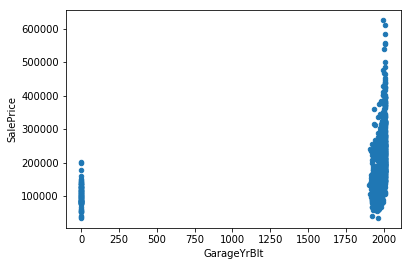

In [74]:
_ = hp_train.plot(kind='scatter', x='GarageYrBlt', y='SalePrice')

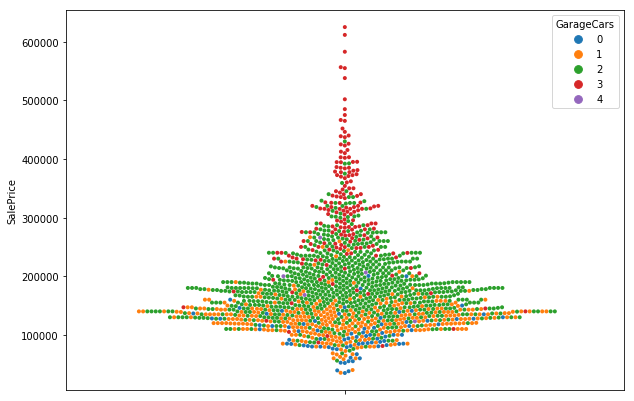

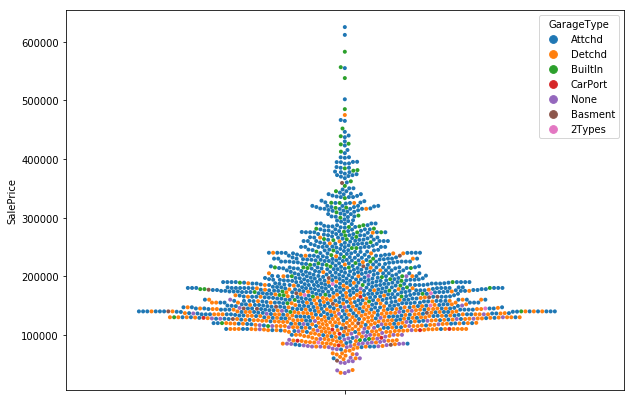

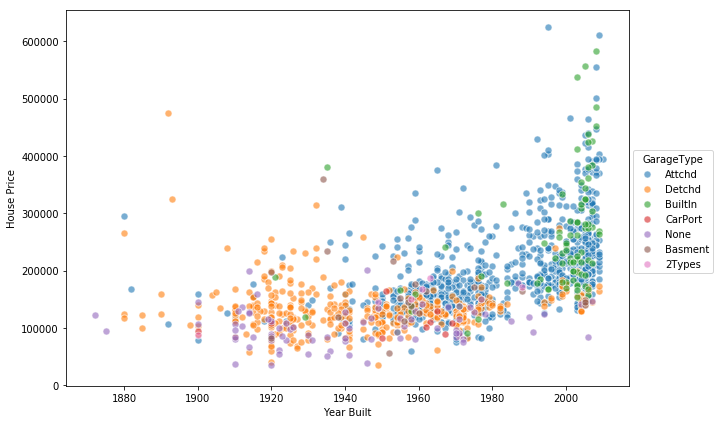

In [75]:
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='GarageCars', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='GarageType', s=4)
plt.show()

g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='GarageType', despine=False)
g.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.6)
g.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

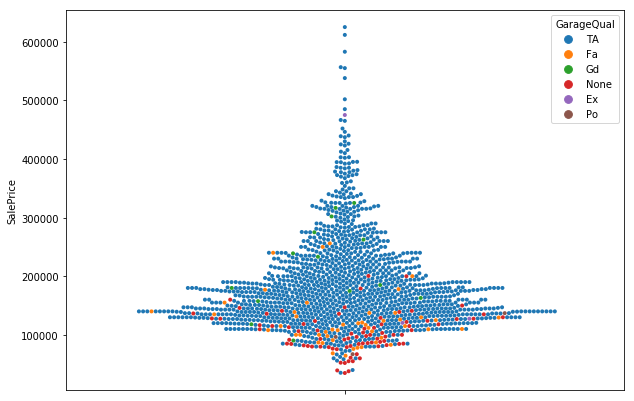

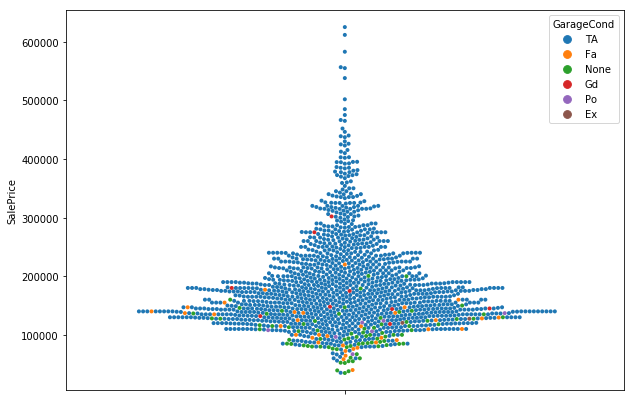

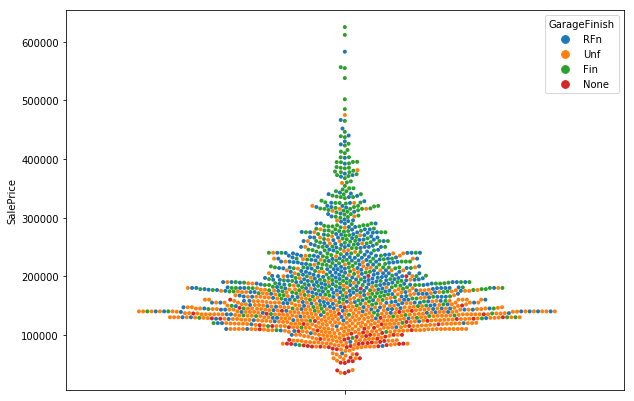

In [76]:
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='GarageQual', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='GarageCond', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='GarageFinish', s=4)
plt.show()

+ #### Filling 'PoolQC' missing values

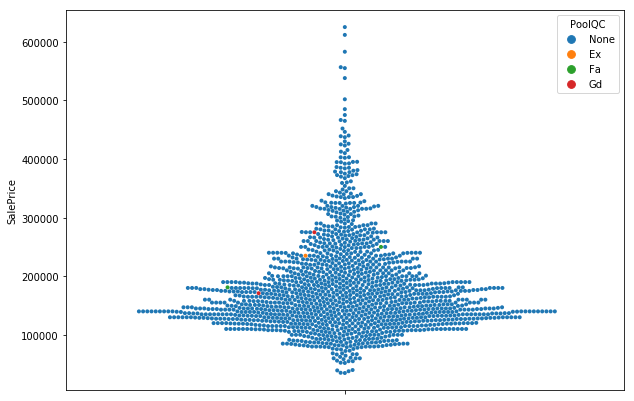

In [77]:
# PoolQC: Pool quality (NA: no pool)

for df_set in (hp_train, hp_test):
    df_set.PoolQC = df_set.PoolQC.fillna('None')
    
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='PoolQC', s=4)
plt.show()

I would say that 'PoolQC' and 'PoolArea' have not enough variability to be estatistically relevant and may be dropped or a new feature might be created with dummy variables (0 and 1)

+ #### Filling 'Fence' missing values

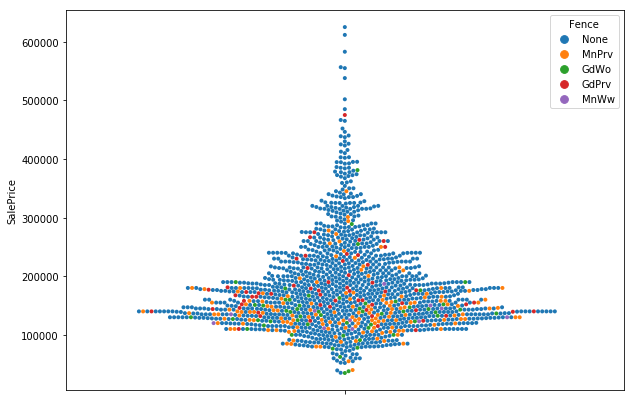

In [78]:
# Fence: Fence quality

for df_set in (hp_train, hp_test):
    df_set.Fence = df_set['Fence'].fillna('None')

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='Fence', s=4)
plt.show()

+ #### Filling 'MiscFeatures' missing values


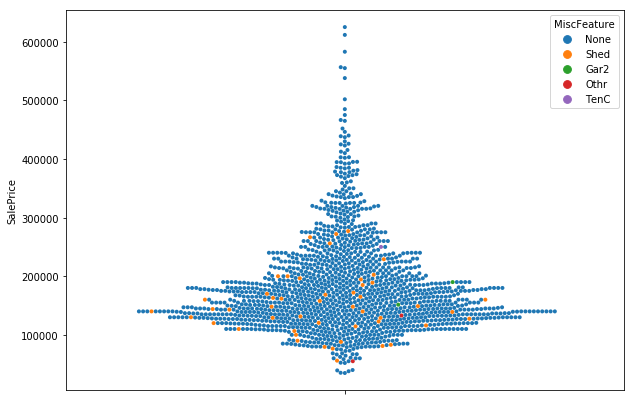

In [79]:
# MiscFeature: Miscellaneous feature not covered in other categories

for df_set in (hp_train, hp_test):
    df_set['MiscFeature'] = df_set['MiscFeature'].fillna('None')

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='MiscFeature', s=4)
plt.show()

+ #### Filling 'SaleType' missing values

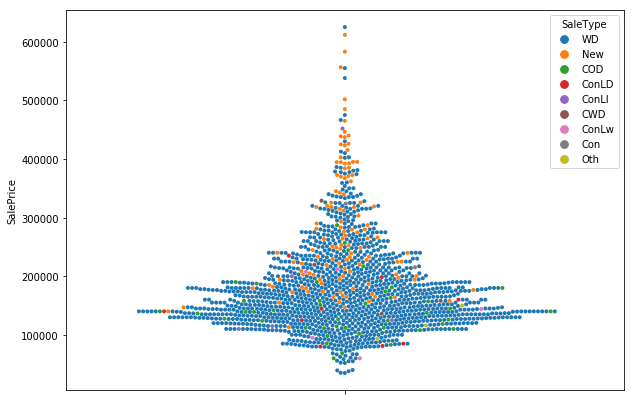

In [80]:
# SaleType: Type of sale

hp_test['SaleType'] = hp_test['SaleType'].fillna('WD')

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='SaleType', s=4)
plt.show()

In [81]:
hp_train.isnull().values.any()

False

In [82]:
hp_test.isnull().values.any()

True

In [83]:
# There is a missing value in Utilities but this feature will be dropped.
pct_missing_test = hp_test.isnull().sum()
pct_missing_test[pct_missing_test > 0]

Utilities    2
dtype: int64

+ #### More EDA

#### MSSubClass: Identifies the type of dwelling involved in the sale.
    * **20:**	1-STORY 1946 & NEWER ALL STYLES, 
    * **30:**	1-STORY 1945 & OLDER
    * ** 40:**	1-STORY W/FINISHED ATTIC ALL AGES
    * ** 45:**	1-1/2 STORY - UNFINISHED ALL AGES
    * **50:**	1-1/2 STORY FINISHED ALL AGES
    * **60:**	2-STORY 1946 & NEWER
    * **70:**	2-STORY 1945 & OLDER
    * **75:**	2-1/2 STORY ALL AGES
    * **80:**	SPLIT OR MULTI-LEVEL
    * ** 85:**	SPLIT FOYER
    * ** 90:**	DUPLEX - ALL STYLES AND AGES
    * ** 120:**	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    * ** 150:**	1-1/2 STORY PUD - ALL AGES
    * ** 160:**	2-STORY PUD - 1946 & NEWER
    * ** 180:**	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    * ** 190:**	2 FAMILY CONVERSION - ALL STYLES AND AGES


+ It's actually a categorical feature.
+ It seems that the way MSClass was divided/classified is not the best, such as separating newer and older houses by the year 1945. It seems that making that classification with houses built before and after 1980 is more relevant.
+ All these informations can be found is other columns.
+ It may be possible to drop 'MSClass'

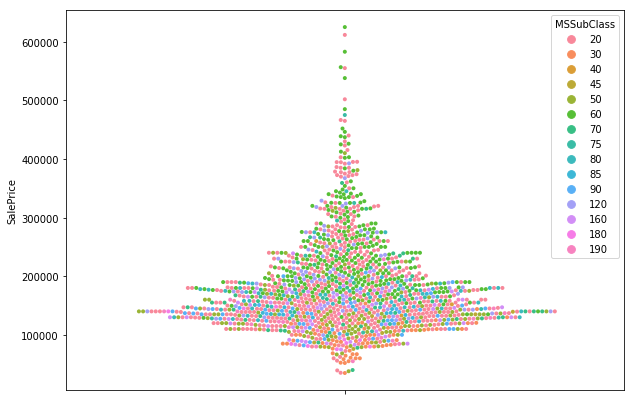

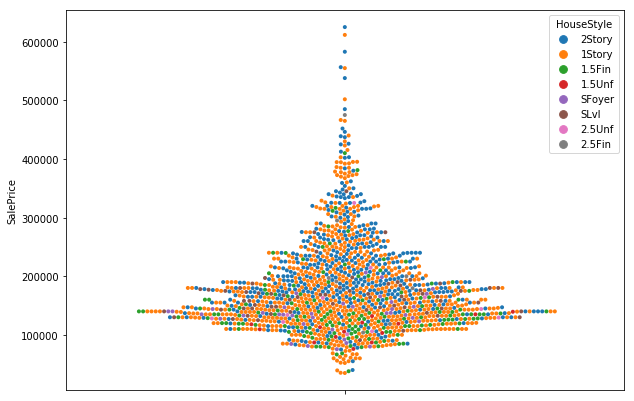

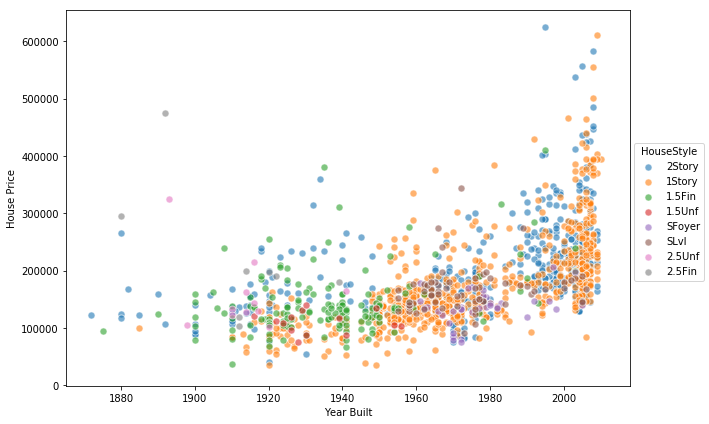

In [84]:
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='MSSubClass', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='HouseStyle', s=4)
plt.show()

g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='HouseStyle', despine=False)
g.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.6)
g.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

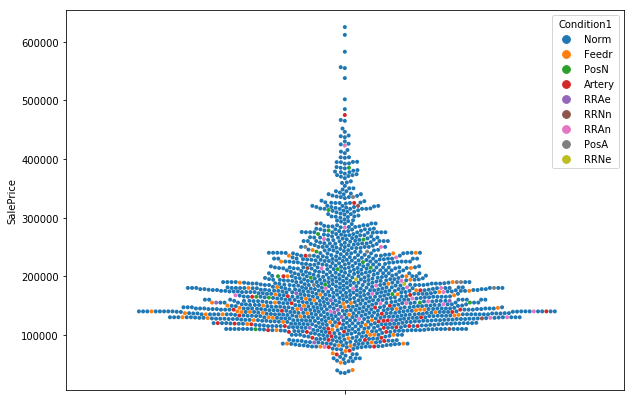

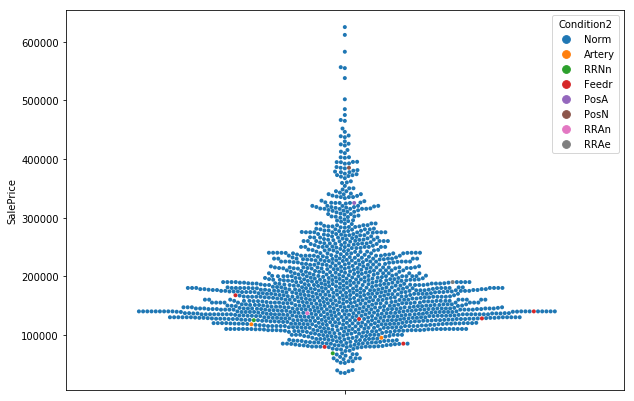

In [85]:
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='Condition1', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='Condition2', s=4)
plt.show()

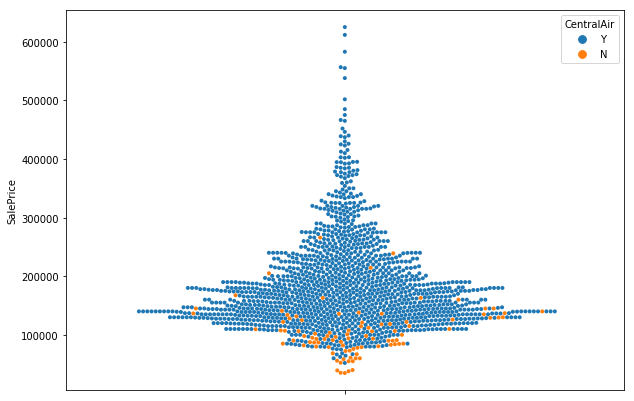

In [86]:
# CentralAir: Central air conditioning
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='CentralAir', s=4)
plt.show()

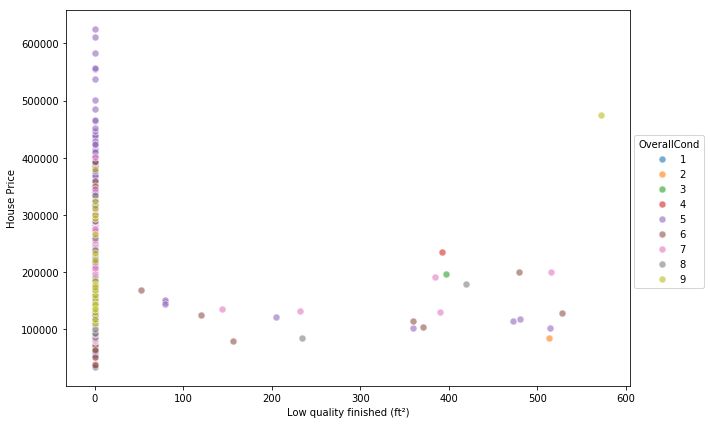

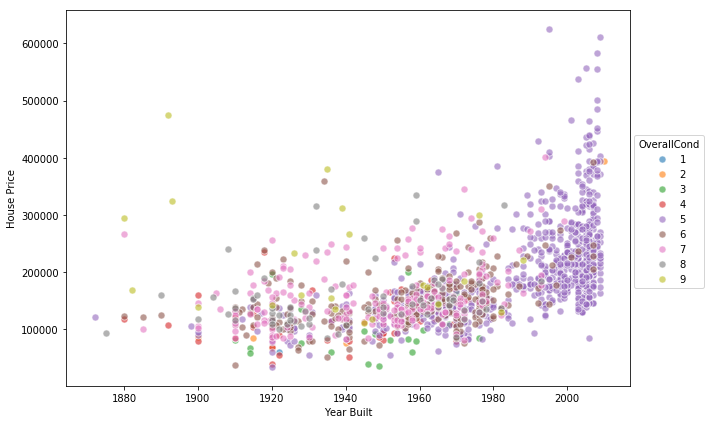

In [87]:
# LowQualFinSF: Low quality finished square feet (all floors)

g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='OverallCond', despine=False)
g.map(plt.scatter,'LowQualFinSF', 'SalePrice', edgecolor='w', s=50, alpha=0.6)
g.add_legend()
plt.xlabel('Low quality finished (ft²)')
plt.ylabel('House Price')
plt.show()

g = sns.FacetGrid(hp_train, size=6, aspect=1.5, hue='OverallCond', despine=False)
g.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.6)
g.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

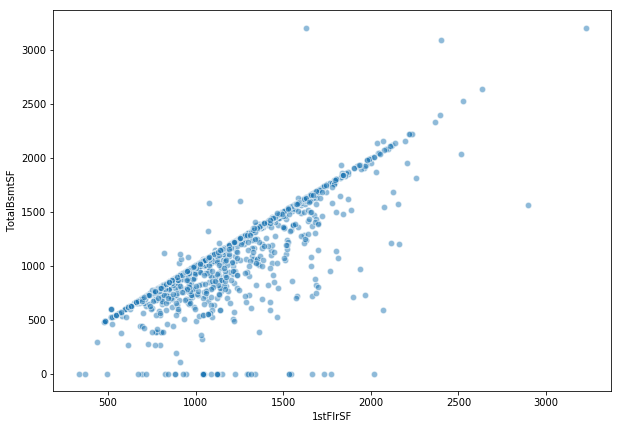

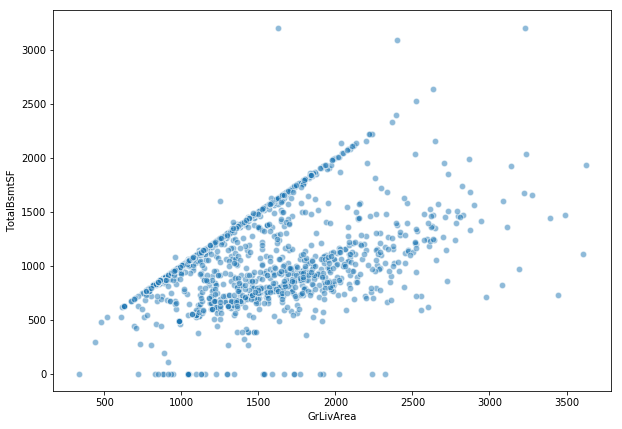

In [88]:
# 1stFlrSF: First Floor square feet
# TotalBsmtSF: Total square feet of basement area

_ = hp_train.plot(kind='scatter', x='1stFlrSF', y='TotalBsmtSF', edgecolor='w', s=40, alpha=0.5, figsize=(10,7))
plt.show()

_ = hp_train.plot(kind='scatter', x='GrLivArea', y='TotalBsmtSF', edgecolor='w', s=40, alpha=0.5, figsize=(10,7))

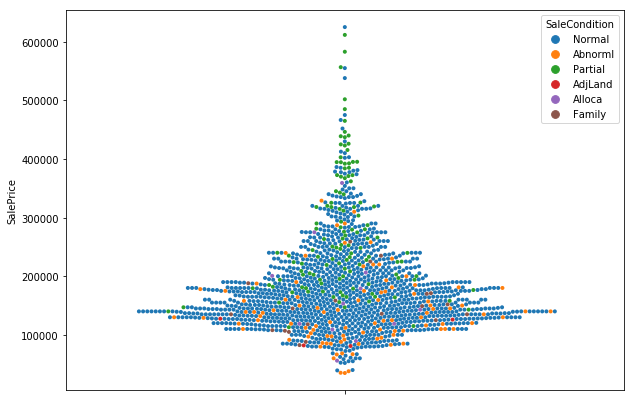

In [89]:
# SaleCondition: Condition of sale

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='SaleCondition', s=4)
plt.show()

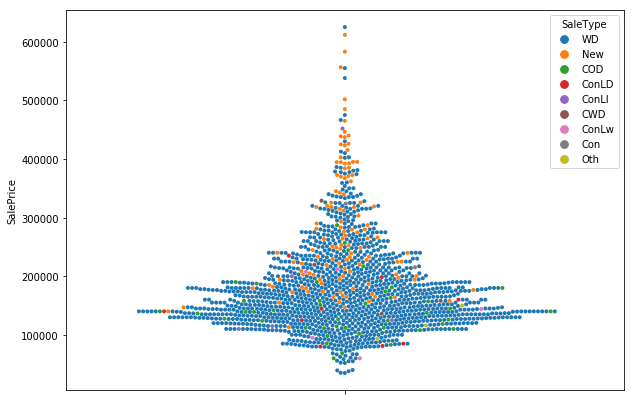

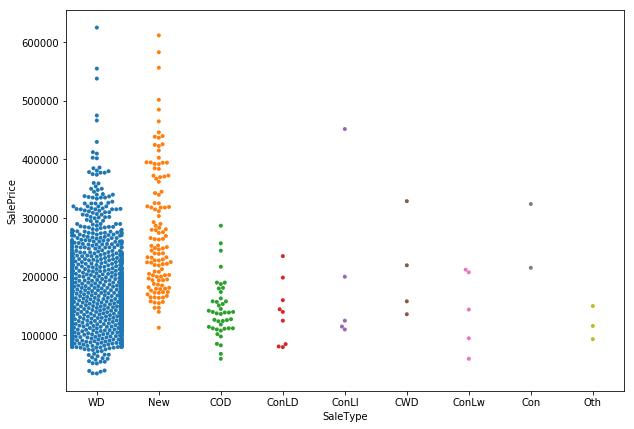

In [90]:
#SaleType: Type of sale
plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x=[""]*len(hp_train), hue='SaleType', s=4)
plt.show()

plt.figure(figsize=(10,7))
_ = sns.swarmplot(y='SalePrice', data=hp_train, x='SaleType', s=4)


# Feature Selection and Engineering

+ #### Dropping irrelevant features

In [91]:
var_to_drop = ['Id', 'Street', 'Utilities', 'RoofMatl', 'MSSubClass', 'PoolArea', 'PoolQC', 'MoSold', 'YrSold', 'Condition2',
              'LotAreaBucket', 'YearBucket']

hp_train = hp_train.drop(var_to_drop, axis=1)
hp_test = hp_test.drop(var_to_drop, axis=1)
    

+ #### Ordinal Categorical features

In [92]:
#ExterQual: Evaluates the quality of the material on the exterior 
#ExterCond: Evaluates the present condition of the material on the exterior
#BsmtQual: Evaluates the height of the basement
#BsmtCond: Evaluates the general condition of the basement
#HeatingQC: Heating quality and condition
#KitchenQual: Kitchen quality
#FireplaceQu: Fireplace quality
#GarageQual: Garage quality
#GarageCond: Garage condition
''' Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor'''

ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
ordinal_var = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
               'FireplaceQu', 'GarageQual', 'GarageCond']    

for df_set in (hp_train, hp_test):
    df_set[ordinal_var] = df_set[ordinal_var].replace(ordinalQUAL_mapper)


In [93]:
#BsmtFinType1: Rating of basement finished area
#BsmtFinType2: Rating of basement finished area (if multiple types)
''' GLQ	Good Living Quarters
    ALQ	Average Living Quarters
    BLQ	Below Average Living Quarters	
    Rec	Average Rec Room
    LwQ	Low Quality
    Unf	Unfinshed
    NA	No Basement'''

ordinalBSMT_mapper = {'GLQ':6, 'ALQ': 5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
ordinal_var = ['BsmtFinType1', 'BsmtFinType2']    

for df_set in (hp_train, hp_test):
    df_set[ordinal_var] = df_set[ordinal_var].replace(ordinalBSMT_mapper)


+ #### Dropping corrolated features

In [94]:
# consider dropping 1stFlrSF and BsmtFinType2
corr_var_drop = ['GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCond', 'FireplaceQu']

hp_train = hp_train.drop(corr_var_drop, axis=1)
hp_test = hp_test.drop(corr_var_drop, axis=1)

+ #### Transforming categorical features to one-hot vectors

In [95]:
cat_features = (hp_train.select_dtypes(include=['object']).columns)
cat_features

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [96]:
hp_train_cat = hp_train[cat_features]
hp_test_cat = hp_test[cat_features]
hp_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 27 columns):
MSZoning         1456 non-null object
Alley            1456 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
RoofStyle        1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-null object
MasVnrType       1456 non-null object
Foundation       1456 non-null object
BsmtExposure     1456 non-null object
Heating          1456 non-null object
CentralAir       1456 non-null object
Electrical       1456 non-null object
Functional       1456 non-null object
GarageType       1456 non-null object
GarageFinish     1456 non-null object
PavedDrive       1456 non-null object
Fence            14

In [97]:
hp_train_encoded = pd.get_dummies(hp_train_cat)
hp_test_encoded = pd.get_dummies(hp_test_cat)

# Get missing columns in the training test
missing_cols = set( hp_train_encoded.columns ) - set( hp_test_encoded.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    hp_test_encoded[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
hp_test_encoded = hp_test_encoded[hp_train_encoded.columns]

hp_test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 183 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: int64(9), uint8(174)
memory usage: 350.6 KB


+ #### Standardization of numerical features

In [98]:
hp_label = hp_train['SalePrice'].copy()
hp_train = hp_train.drop(['SalePrice'], axis=1)

numeric_features = (hp_train._get_numeric_data().columns)
numeric_features


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'],
      dtype='object')

In [99]:
scaler = StandardScaler()
hp_train_scaled = scaler.fit_transform(hp_train[numeric_features])
hp_test_scaled = scaler.transform(hp_test[numeric_features])

df_hp_train_scaled = pd.DataFrame(hp_train_scaled, index=hp_train.index, columns=numeric_features)
df_hp_test_scaled = pd.DataFrame(hp_test_scaled, index=hp_test.index, columns=numeric_features)

df_hp_train_scaled.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.246076 -0.202770     0.665646    -0.517461   1.053769      0.880629   
1     0.433784 -0.086107    -0.064709     2.176545   0.159469     -0.427190   
2    -0.110104  0.081281     0.665646    -0.517461   0.987524      0.832191   
3    -0.472696 -0.091179     0.665646    -0.517461  -1.860986     -0.717817   
4     0.615081  0.386636     1.396000    -0.517461   0.954402      0.735316   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinType1  \
0    0.528428   1.066349  -0.238458  0.589513  0.118048      1.168490   
1   -0.579260  -0.688006  -0.238458  0.589513  0.118048      0.693658   
2    0.336278   1.066349  -0.238458  0.589513  0.118048      1.168490   
3   -0.579260  -0.688006  -0.238458 -0.554928  1.927294      0.693658   
4    1.398755   1.066349  -0.238458  0.589513  0.118048      1.168490   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0    0.625446     -0.279725   -0.289082  -0.943320    -0.472456   0.893378   
1    1.257846     -0.279725   -0.289082  -0.640184     0.512947   0.893378   
2    0.113946     -0.279725   -0.289082  -0.300852    -0.317122   0.893378   
3   -0.513805     -0.279725   -0.289082  -0.061058    -0.715166  -0.148896   
4    0.506871     -0.279725   -0.289082  -0.174169     0.228976   0.893378   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.815613  1.183333     -0.120409   0.409745      1.114055     -0.239817   
1  0.284120 -0.796357     -0.120409  -0.492308     -0.819275      3.967098   
2 -0.642256  1.211151     -0.120409   0.562772      1.114055     -0.239817   
3 -0.531200  0.956156     -0.120409   0.423840      1.114055     -0.239817   
4 -0.032798  1.644643     -0.120409   1.392339      1.114055     -0.239817   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  \
0  0.800349  1.231823      0.165909     -0.211757     0.746315   -0.951673   
1  0.800349 -0.758781      0.165909     -0.211757    -0.769215    0.610487   
2  0.800349  1.231823      0.165909     -0.211757     0.746315    0.610487   
3 -1.026153 -0.758781      0.165909     -0.211757     0.746315    0.610487   
4  0.800349  1.231823      1.392121     -0.211757     0.746315    0.610487   

   GarageArea  GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0    0.360672    0.262927   -0.749775     0.226218      -0.359882  -0.116501   
1   -0.054591    0.262927    1.631381    -0.707503      -0.359882  -0.116501   
2    0.643806    0.262927   -0.749775    -0.064613      -0.359882  -0.116501   
3    0.804249    0.262927   -0.749775    -0.171761       4.086653  -0.116501   
4    1.719716    0.262927    0.784392     0.578277      -0.359882  -0.116501   

   ScreenPorch   MiscVal  
0    -0.270606 -0.087809  
1    -0.270606 -0.087809  
2    -0.270606 -0.087809  
3    -0.270606 -0.087809  
4    -0.270606 -0.087809

+ #### Concat numerical and categorical features


In [100]:
hp_train_prepared = pd.concat([df_hp_train_scaled, hp_train_encoded], axis = 1)
hp_test_prepared = pd.concat([df_hp_test_scaled, hp_test_encoded], axis = 1)

hp_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 221 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(38), uint8(183)
memory usage: 743.8 KB


# Training the models

In [101]:
X_train = hp_train_prepared.copy()
y_train = hp_label.copy()
X_test = hp_test_prepared.copy()
X_train.shape, y_train.shape, X_test.shape

((1456, 221), (1456,), (1459, 221))

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
np.random.seed(87)

import warnings
warnings.filterwarnings('ignore')

classifier_model = [LinearRegression(),
                    Ridge(alpha=15, solver='cholesky'),
                    Lasso(),
                    RandomForestRegressor(),
                    LinearSVR(epsilon=0.5, C=100)]



for classifier in classifier_model:
    clf = classifier
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
   
    
    
    print('---')
    print(clf.__class__.__name__)
    print()
    print(str(classifier))
    print('RMSE scores: ', rmse_scores)
    print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
    print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))
    #print('acuracy train_set: ', scores_train)
    print()
    print()      


---
LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE scores:  [2.20825842e+04 2.63884187e+04 1.14706174e+14 2.45710259e+04
 4.84115993e+12 2.63545639e+04 4.88874035e+11 1.10587972e+14
 1.49402144e+13 4.62178575e+14]
RMSE mean: 70774297014072.5469
RMSE std: 137532947289231.2969


---
Ridge

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)
RMSE scores:  [21114.90531368 25631.69053373 21438.67916835 23833.54371011
 25783.83690108 24690.48877029 24355.16485441 22567.76295337
 25618.60535761 22524.19264371]
RMSE mean: 23755.8870
RMSE std: 1661.7019


---
Lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE scores:  [21983.84311899 26287.53137777 23998.10797363 24489.07585795
 27076.04739668 26233.39130775 26243

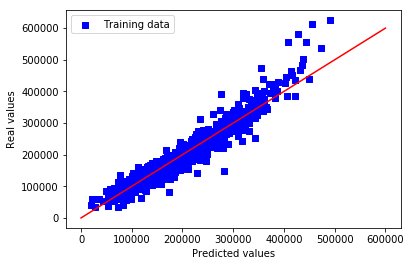

LotFrontage               2089.670788
LotArea                   4906.121926
OverallQual              12371.728935
OverallCond               5929.074134
YearBuilt                 6194.751526
YearRemodAdd               522.922866
MasVnrArea                5461.274052
ExterQual                 4520.916369
ExterCond                -1119.673021
BsmtQual                  3319.692685
BsmtCond                 -2088.195702
BsmtFinType1               692.363434
BsmtFinSF1                7463.710193
BsmtFinType2               495.577113
BsmtFinSF2                 429.904717
BsmtUnfSF                  292.409474
TotalBsmtSF               8273.671251
HeatingQC                  438.811881
1stFlrSF                  8034.986926
2ndFlrSF                 11316.649787
LowQualFinSF               200.618060
GrLivArea                15821.992213
BsmtFullBath              1073.040651
BsmtHalfBath              -766.205074
FullBath                  1469.070283
HalfBath                  2197.056150
BedroomAbvGr

(1459, 2)

In [153]:
best_classifier = Ridge(alpha=15, solver='cholesky')

best_classifier.fit(X_train, y_train)
y_predicted = best_classifier.predict(X_train)

plt.scatter(y_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

#best_classifier.coef_
print(pd.Series(best_classifier.coef_, index=X_train.columns))

final_prediction = best_classifier.predict(X_test)

submission = pd.DataFrame({'Id': houseprices_test['Id'],
                           'SalePrice': final_prediction})

submission.to_csv('HousePrices_3rd_Submission.csv', index=False)

submission.shape

In [114]:
X_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond     YearBuilt  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean  -3.218389e-16  7.157164e-17 -1.633309e-16  7.434529e-17 -9.782887e-16   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -2.240333e+00 -9.281155e-01 -3.716479e+00 -4.109470e+00 -3.285242e+00   
25%   -4.726959e-01 -2.952139e-01 -7.950627e-01 -5.174614e-01 -5.692198e-01   
50%   -1.945571e-02 -9.944678e-02 -6.470858e-02 -5.174614e-01  2.698005e-02   
75%    4.337845e-01  1.155699e-01  6.656456e-01  3.805408e-01  9.544021e-01   
max    1.099428e+01  2.077593e+01  2.856708e+00  3.074547e+00  1.285624e+00   

       YearRemodAdd    MasVnrArea     ExterQual     ExterCond      BsmtQual  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean   4.852269e-15  9.683951e-17 -1.717186e-16 -8.352217e-16 -3.245267e-16   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -1.686572e+00 -5.792604e-01 -2.442362e+00 -5.930172e+00 -3.988249e+00   
25%   -8.752398e-01 -5.792604e-01 -6.880062e-01 -2.384578e-01 -5.549279e-01   
50%    4.204704e-01 -5.792604e-01 -6.880062e-01 -2.384578e-01  5.895126e-01   
75%    9.290669e-01  3.659484e-01  1.066349e+00 -2.384578e-01  5.895126e-01   
max    1.219693e+00  8.463095e+00  2.820705e+00  5.453256e+00  1.733953e+00   

           BsmtCond  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean  -1.014146e-16  3.450384e-18 -1.312290e-16 -7.724285e-17 -5.718869e-17   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -5.309689e+00 -1.680499e+00 -1.016005e+00 -1.398624e+00 -2.890821e-01   
25%    1.180483e-01 -1.205667e+00 -1.016005e+00 -2.797247e-01 -2.890821e-01   
50%    1.180483e-01  2.188268e-01 -1.301793e-01 -2.797247e-01 -2.890821e-01   
75%    1.180483e-01  1.168490e+00  6.266086e-01 -2.797247e-01 -2.890821e-01   
max    1.927294e+00  1.168490e+00  4.071098e+00  5.314770e+00  8.839724e+00   

          BsmtUnfSF   TotalBsmtSF     HeatingQC      1stFlrSF      2ndFlrSF  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean  -6.519510e-17  5.410050e-17 -3.851467e-16 -3.458009e-17 -2.501052e-17   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -1.282652e+00 -2.550055e+00 -3.275719e+00 -2.229556e+00 -7.963568e-01   
25%   -7.793101e-01 -6.205094e-01 -1.191171e+00 -7.451870e-01 -7.963568e-01   
50%   -2.024462e-01 -1.460111e-01  8.933779e-01 -1.926118e-01 -7.963568e-01   
75%    5.452147e-01  5.900073e-01  8.933779e-01  6.288022e-01  8.912476e-01   
max    4.001874e+00  5.231231e+00  8.933779e-01  5.609428e+00  3.418018e+00   

       LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean  -5.589050e-16  4.071834e-17  5.002104e-17 -2.347405e-16 -1.427430e-16   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -1.204092e-01 -2.360847e+00 -8.192750e-01 -2.398173e-01 -2.852654e+00   
25%   -1.204092e-01 -7.621183e-01 -8.192750e-01 -2.398173e-01 -1.026153e+00   
50%   -1.204092e-01 -9.665271e-02 -8.192750e-01 -2.398173e-01  8.003488e-01   
75%   -1.204092e-01  5.411271e-01  1.114055e+00 -2.398173e-01  8.003488e-01   
max    1.163168e+01  4.269647e+00  4.980714e+00  8.174014e+00  2.626850e+00   

           HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual    Fireplaces  \
count  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03  1.456000e+03   
mean  -5.139357e-17  3.869005e-16 -2.968093e-16 -2.890697e-16 -1.090398e-16   
std    1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00  1.000344e+00   
min   -7.587811e-01 -3.512727e+00 -4.745845e+00 -2.284745e+00 -9.516735e-01   
25%   -7.587811e-01 -1.060303e+00 -2.117568e-01 -7.69